In [174]:
# Import necessary libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
from scipy import stats  # Statistical functions

import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Enhanced plotting library with built-in themes
sns.set_style('darkgrid')  # Set the style for Seaborn plots

# Import tools for data splitting and preprocessing
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # Standardize features by removing mean and scaling to unit variance

# Import classification models
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.svm import LinearSVC, SVC  # Support Vector Machine classifiers
from sklearn.neural_network import MLPClassifier  # Multi-Layer Perceptron classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Random Forest and Gradient Boosting classifiers

# Import regression model
from sklearn.linear_model import LinearRegression  # Linear Regression model

import warnings
warnings.filterwarnings(action='ignore')  # Ignore warnings for cleaner output


In [175]:
# Create a list of DataFrames by reading CSV files for each decade

dfs = [pd.read_csv(f'C:\\Users\\HP\\Documents\\spotify data\\dataset-of-{decade}0s.csv') 
       for decade in ['6', '7', '8', '9', '0', '1']]

In [176]:
dfs[0]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.6200,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.5050,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.6490,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.5450,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.7650,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8637,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.808,0.879000,0.3630,0.183,119.821,26244,4,0.00000,2,0
8638,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.663,0.000000,0.1070,0.834,135.104,142987,4,28.34316,10,0
8639,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.940,0.000178,0.1150,0.139,92.472,137200,4,56.63498,6,0
8640,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.658,0.000000,0.7380,0.853,137.976,159107,3,28.24372,9,0


In [177]:
# Iterate through the decades and their corresponding indices using enumerate
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    # Add a 'decade' column to each DataFrame with the current decade
    dfs[i]['decade'] = pd.Series(decade, index=dfs[i].index)

# Concatenate the DataFrames along the rows, shuffle the combined data, and reset index
data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)


In [178]:
data

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Attaining - Take 1 / Alternate Version,John Coltrane,spotify:track:3EwLV5hZqLKx5e0Lp1QcB7,0.342,0.462,4,-12.931,0,0.0389,0.51400,0.018100,0.0977,0.397,98.466,816867,4,24.84938,33,0,1970
1,So Fly,NB Ridaz Featuring Gemini,spotify:track:2BjIi07kN0yKSur0Fwrnss,0.861,0.519,2,-6.404,1,0.1120,0.13600,0.000000,0.1230,0.519,81.966,254533,4,50.03590,11,1,2000
2,Because I Got It Like That,Jungle Brothers,spotify:track:5unLExF3iiG3YkU11u6wFO,0.900,0.916,1,-7.481,0,0.1150,0.22000,0.000141,0.0323,0.538,102.916,277894,4,24.71271,16,0,1980
3,Babylon a Fall - Remastered,Yabby You,spotify:track:6xfe0G2HwRDQaChxkzvNKw,0.714,0.301,2,-14.800,1,0.1230,0.15600,0.661000,0.2290,0.651,74.856,357671,4,104.64231,11,0,1970
4,Fins,Jimmy Buffett,spotify:track:4h0gZ422QxBRdTV14u0P8y,0.661,0.645,4,-13.520,1,0.0487,0.00895,0.000000,0.0362,0.930,136.693,204640,4,31.99617,10,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,"Little Boat - Live At The Jazz Workshop, Bosto...",Gábor Szabó,spotify:track:2NgC1cZ0A2MNXePeUZAtrA,0.435,0.834,10,-10.762,1,0.0415,0.78900,0.422000,0.9320,0.708,114.130,263067,4,17.81915,10,0,1960
41102,Loser,3 Doors Down,spotify:track:1aC1IBAETh2XYGOE8kCC6t,0.499,0.880,6,-6.424,0,0.0654,0.01080,0.000028,0.2260,0.390,147.899,264800,4,55.42304,11,1,2000
41103,Peppermint Twist - Part I,Joey Dee & the Starliters,spotify:track:3RW8ZidI0OE9BnzZeNoNQv,0.326,0.816,8,-14.825,1,0.0527,0.88100,0.326000,0.1850,0.826,147.213,259267,4,25.73316,13,1,1960
41104,Muskrat Love,Captain & Tennille,spotify:track:3NRiJ7XFMALvrXXB1oRBFO,0.659,0.257,9,-16.552,1,0.0382,0.89000,0.000140,0.2520,0.222,102.977,228160,4,20.91621,13,1,1970


In [179]:
# check for any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [180]:
new_data = data.copy()

## Dropping some categorical columns

In [181]:
# too many unique identifiers which make no similarities in the data set
len(new_data['track'].unique())

35860

In [182]:
# too many unique identifiers which make no similarities in the data set
len(new_data['artist'].unique())

11904

In [183]:
# Create dummy variables for the 'artist' column using one-hot encoding
artist_dummies = pd.get_dummies(new_data['artist'])

In [184]:
# drop the columns 'artist', 'uri', and 'track' from the DataFrame 'new_data' because of high-cardinality

new_data = new_data.drop(['artist', 'uri', 'track'], axis=1)

In [185]:
new_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,0.342,0.462,4,-12.931,0,0.0389,0.51400,0.018100,0.0977,0.397,98.466,816867,4,24.84938,33,0,1970
1,0.861,0.519,2,-6.404,1,0.1120,0.13600,0.000000,0.1230,0.519,81.966,254533,4,50.03590,11,1,2000
2,0.900,0.916,1,-7.481,0,0.1150,0.22000,0.000141,0.0323,0.538,102.916,277894,4,24.71271,16,0,1980
3,0.714,0.301,2,-14.800,1,0.1230,0.15600,0.661000,0.2290,0.651,74.856,357671,4,104.64231,11,0,1970
4,0.661,0.645,4,-13.520,1,0.0487,0.00895,0.000000,0.0362,0.930,136.693,204640,4,31.99617,10,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,0.435,0.834,10,-10.762,1,0.0415,0.78900,0.422000,0.9320,0.708,114.130,263067,4,17.81915,10,0,1960
41102,0.499,0.880,6,-6.424,0,0.0654,0.01080,0.000028,0.2260,0.390,147.899,264800,4,55.42304,11,1,2000
41103,0.326,0.816,8,-14.825,1,0.0527,0.88100,0.326000,0.1850,0.826,147.213,259267,4,25.73316,13,1,1960
41104,0.659,0.257,9,-16.552,1,0.0382,0.89000,0.000140,0.2520,0.222,102.977,228160,4,20.91621,13,1,1970


# Outlier detection

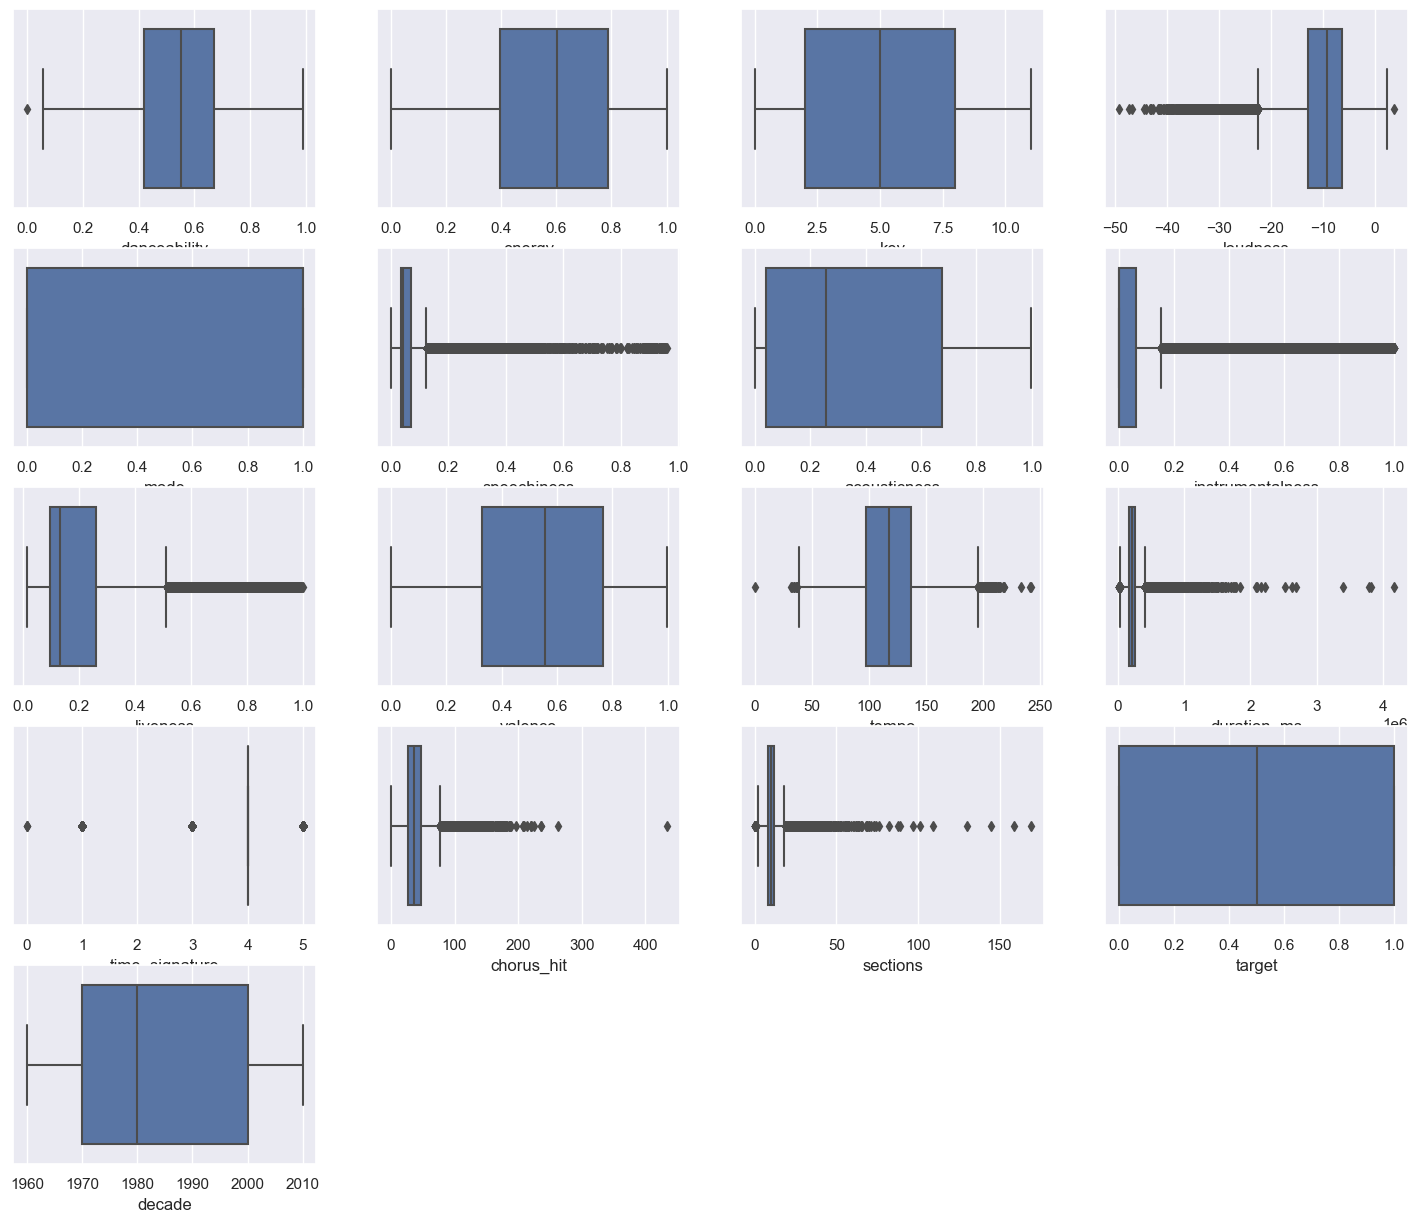

In [186]:
# Create a figure with a specific size for subplots
plt.figure(figsize=(18, 15))

# Loop through each column in the DataFrame
for i in range(len(new_data.columns)):
    # Create a subplot within the figure grid
    plt.subplot(5, 4, i + 1)
    
    # Create a box plot for the current column
    sns.boxplot(new_data[new_data.columns[i]])

# Display the subplots
plt.show()



In [187]:
def get_outlier_counts(df, threshold):
    df = df.copy()
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    
    # Compare df z_scores to the threshold and return the count of outliers in each column
    return (z_score_df > threshold_z_score).sum(axis=0)

In [188]:
get_outlier_counts(new_data, 0.999999999999999)

danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness         112
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_ms          89
time_signature        3
chorus_hit           13
sections             67
target                0
decade                0
dtype: int64

In [189]:
def remove_outliers(df, threshold):
    df = df.copy()
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    z_score_df = z_score_df > threshold_z_score
    
    # Get indices of the outliers
    outliers = z_score_df.sum(axis=1)
    outliers = outliers > 0
    outlier_indices = df.index[outliers]
    
    # Drop outlier examples
    df = df.drop(outlier_indices, axis=0).reset_index(drop=True)
    
    return df

In [144]:
# remove all the outliers
remove_outliers(new_data,0.9999999999999999)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,0.342,0.462,4,-12.931,0,0.0389,0.51400,0.018100,0.0977,0.397,98.466,816867,4,24.84938,33,0,1970
1,0.861,0.519,2,-6.404,1,0.1120,0.13600,0.000000,0.1230,0.519,81.966,254533,4,50.03590,11,1,2000
2,0.900,0.916,1,-7.481,0,0.1150,0.22000,0.000141,0.0323,0.538,102.916,277894,4,24.71271,16,0,1980
3,0.714,0.301,2,-14.800,1,0.1230,0.15600,0.661000,0.2290,0.651,74.856,357671,4,104.64231,11,0,1970
4,0.661,0.645,4,-13.520,1,0.0487,0.00895,0.000000,0.0362,0.930,136.693,204640,4,31.99617,10,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,0.435,0.834,10,-10.762,1,0.0415,0.78900,0.422000,0.9320,0.708,114.130,263067,4,17.81915,10,0,1960
41102,0.499,0.880,6,-6.424,0,0.0654,0.01080,0.000028,0.2260,0.390,147.899,264800,4,55.42304,11,1,2000
41103,0.326,0.816,8,-14.825,1,0.0527,0.88100,0.326000,0.1850,0.826,147.213,259267,4,25.73316,13,1,1960
41104,0.659,0.257,9,-16.552,1,0.0382,0.89000,0.000140,0.2520,0.222,102.977,228160,4,20.91621,13,1,1970


# preprocessing

In [190]:
def preprocess_inputs(df, outliers=True, threshold=0.95):
    df = df.copy()
    
    # Remove outliers if specified
    if outliers == False:
        df = remove_outliers(df, threshold)
    
    # Split df into X and y
    y = df['target']
    X = df.drop('target', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    #X_train = scaler.transform(X_train)
    #X_test = scaler.transform(X_test)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [191]:
outlier_X_train, outlier_X_test, outlier_y_train, outlier_y_test = preprocess_inputs(new_data, outliers=True)

X_train, X_test, y_train, y_test = preprocess_inputs(new_data, outliers=False, threshold=0.99999999999)

In [192]:
# All values comes close to zero after scaling
X_train.mean()

danceability        3.945023e-16
energy              1.177312e-16
key                 8.569330e-17
loudness            6.116467e-17
mode                2.267204e-15
speechiness        -5.703340e-17
acousticness       -2.282278e-16
instrumentalness    3.846155e-16
liveness           -1.920037e-16
valence             3.169381e-16
tempo              -1.106300e-16
duration_ms        -7.163995e-18
time_signature      4.024882e-16
chorus_hit          3.651688e-16
sections            1.833920e-16
decade             -3.781757e-15
dtype: float64

In [193]:
# All values comes close to one after scaling
X_train.var()

danceability        1.000035
energy              1.000035
key                 1.000035
loudness            1.000035
mode                1.000035
speechiness         1.000035
acousticness        1.000035
instrumentalness    1.000035
liveness            1.000035
valence             1.000035
tempo               1.000035
duration_ms         1.000035
time_signature      1.000035
chorus_hit          1.000035
sections            1.000035
decade              1.000035
dtype: float64

In [194]:
# Data after splitting
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade
33134,0.441692,0.117208,-1.475340,0.824593,0.662352,0.125351,-0.886682,-0.503106,-0.488061,-0.240498,-1.286213,0.014653,0.244531,2.443604,-0.597357,1.553805
33911,0.707640,1.342578,1.360631,1.202583,-1.509770,1.690397,0.572688,-0.503074,-0.534381,0.277197,-1.239687,-0.485370,0.244531,0.345479,-1.613987,-1.307121
35897,-0.039278,-1.987475,-1.191743,-1.406909,0.662352,-0.481532,1.754352,-0.071326,-0.476481,-1.185853,-0.375349,-0.644135,0.244531,-0.256585,-0.851514,-0.734936
17457,0.990564,1.123049,-1.475340,0.434522,0.662352,0.020103,0.129192,-0.502508,-0.059602,1.575184,-0.678982,0.299750,0.244531,0.721673,-0.343200,0.981620
23145,0.022965,0.236951,0.226242,1.162310,-1.509770,-0.363982,-0.845309,-0.503106,0.067778,0.596067,2.155075,-0.022924,0.244531,-0.250374,-0.089042,0.409435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,-0.650393,-1.770740,1.077034,-1.865444,-1.509770,-0.496567,0.566735,-0.503103,-0.908993,-0.953265,0.630126,-0.258011,0.244531,1.679429,-0.597357,-1.307121
32511,-0.384445,-1.858551,0.793437,-1.911662,0.662352,-0.497934,1.468609,1.938112,-0.517011,-1.706923,-0.175327,0.292751,3.415815,-0.026478,1.944217,-1.307121
5192,-1.006877,-0.453567,-0.057355,-0.560219,-1.509770,0.036505,0.977489,-0.494670,-0.673920,-0.229243,-1.131471,1.190913,0.244531,-0.180131,1.944217,-1.307121
12172,-1.719844,-1.211939,-0.624549,-0.263158,0.662352,-0.541673,1.739469,-0.502832,0.750997,-1.020791,-1.466433,-0.445499,-2.926752,-0.733097,-0.343200,-1.307121


# TRAINING

In [195]:
# Create a dictionary of different classification models along with their names
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Iterate through each model in the models dictionary
for name, model in models.items():
    # Fit the model using the training data
    model.fit(X_train, y_train)
    # Print a message indicating that the current model has been trained
    print(name + " trained.")


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [196]:
# Iterate through each model in the models dictionary
for name, model in models.items():
    # Calculate and print the accuracy score of the model on the test data
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))


Logistic Regression: 73.95%
K-Nearest Neighbors: 75.32%
Decision Tree: 71.93%
Support Vector Machine (Linear Kernel): 73.99%
Support Vector Machine (RBF Kernel): 79.73%
Neural Network: 80.01%
Random Forest: 80.73%
Gradient Boosting: 79.85%


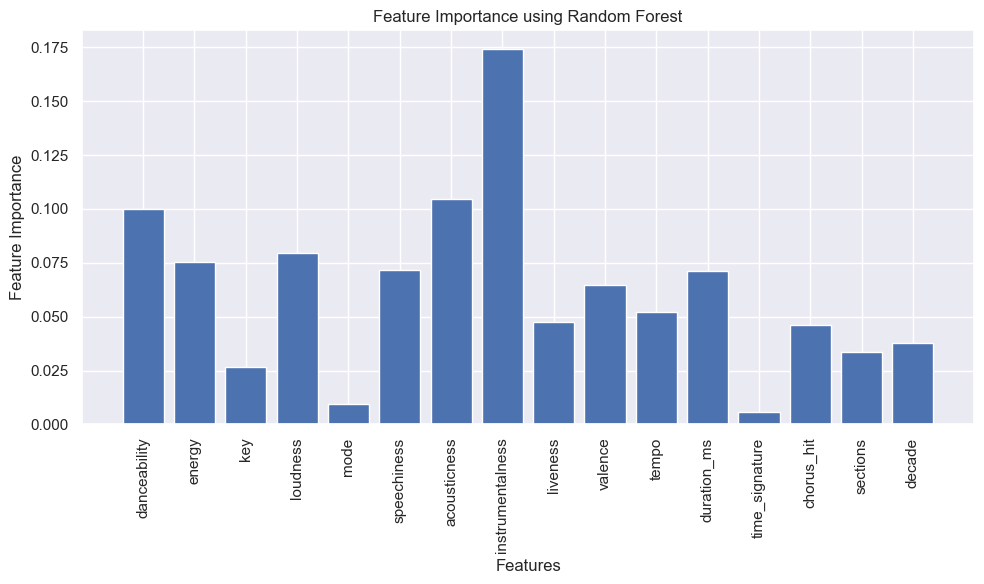

In [198]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

feature_importances = model1.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X_train.columns)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance using Random Forest')
plt.tight_layout()
plt.show()


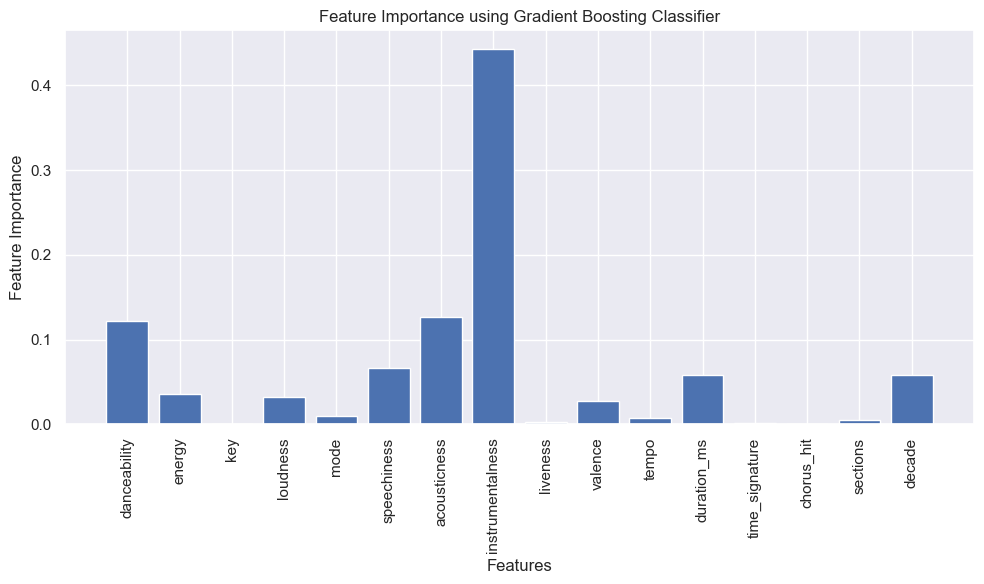

In [199]:
model1 = GradientBoostingClassifier()
model1.fit(X_train, y_train)

feature_importances = model1.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X_train.columns)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance using Gradient Boosting Classifier')
plt.tight_layout()
plt.show()

# RESULTS

In [200]:
# Iterate through each model in the models dictionary
for name, model in models.items():
    # Make predictions using the current model on the test data
    predictions = model.predict(X_test)
    # Print the predictions along with the model's name
    print(f"Predictions using {name}:", predictions)


Predictions using Logistic Regression: [1 1 1 ... 1 1 1]
Predictions using K-Nearest Neighbors: [1 1 0 ... 0 1 1]
Predictions using Decision Tree: [1 1 0 ... 1 1 0]
Predictions using Support Vector Machine (Linear Kernel): [1 1 1 ... 1 1 1]
Predictions using Support Vector Machine (RBF Kernel): [1 0 1 ... 0 1 0]
Predictions using Neural Network: [1 0 1 ... 0 1 0]
Predictions using Random Forest: [1 1 0 ... 0 1 0]
Predictions using Gradient Boosting: [1 1 1 ... 0 1 0]


In [26]:
predictions

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

## Multiple feature plots

In [201]:
interest_feature_cols = ["tempo" , "loudness" , "acousticness" , "danceability" , "duration_ms" , 
                         "energy" , "instrumentalness" , "liveness" , "speechiness" , "valence"]


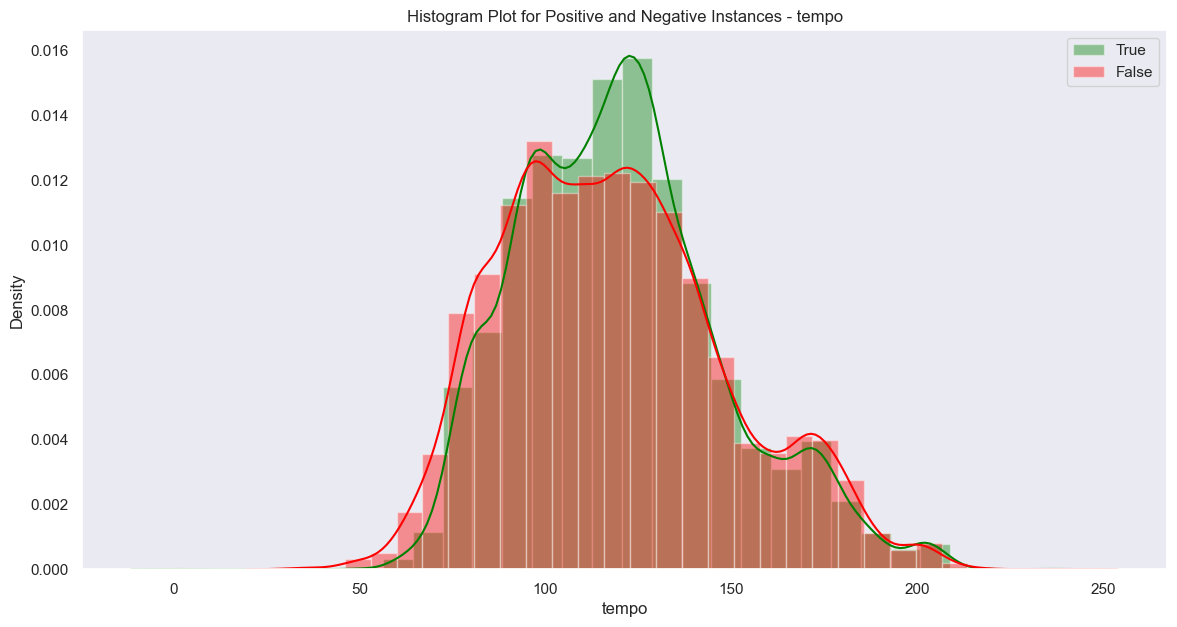

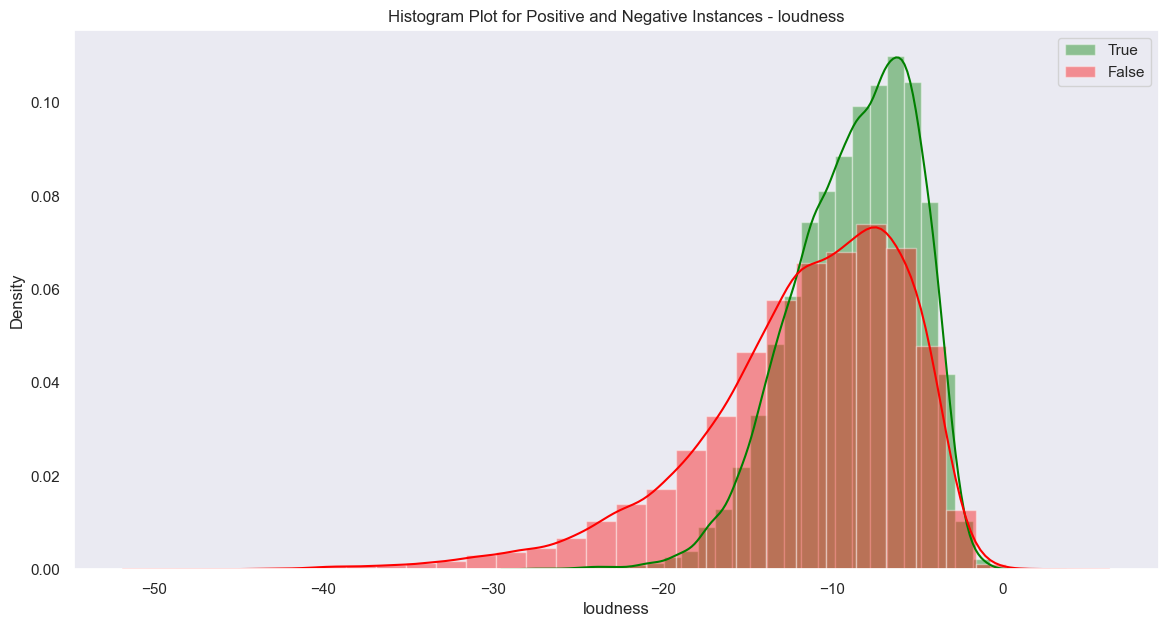

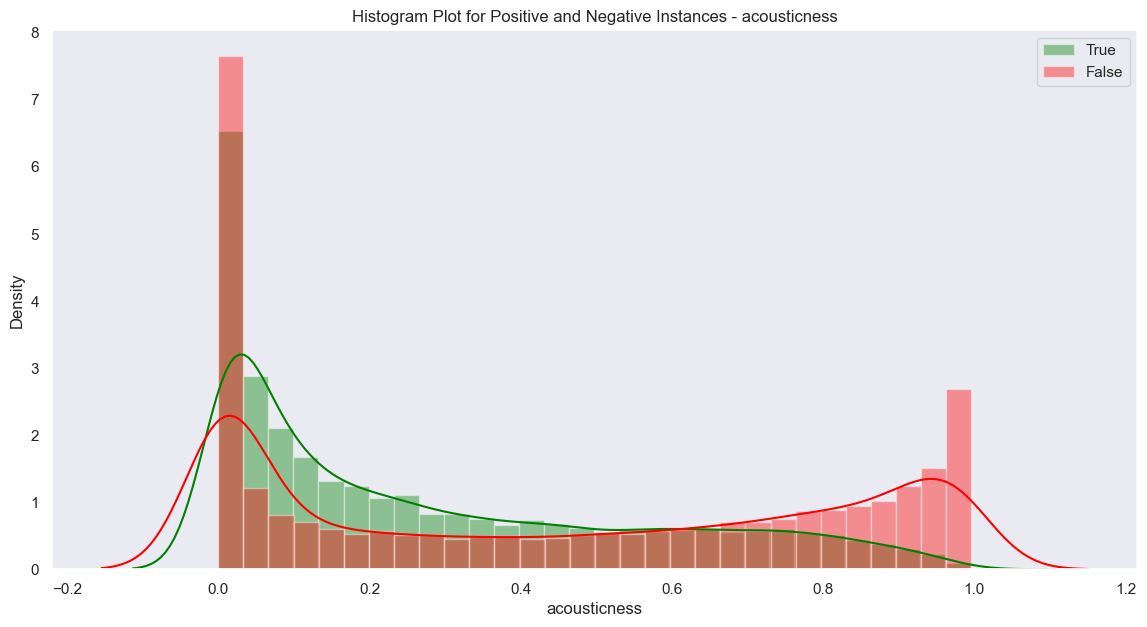

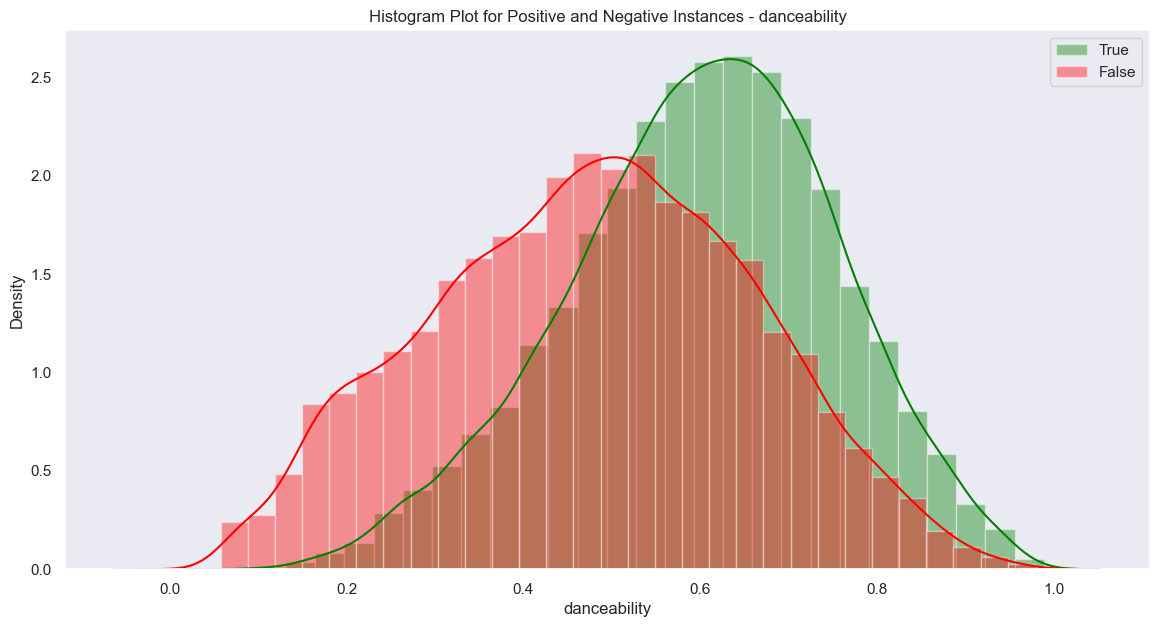

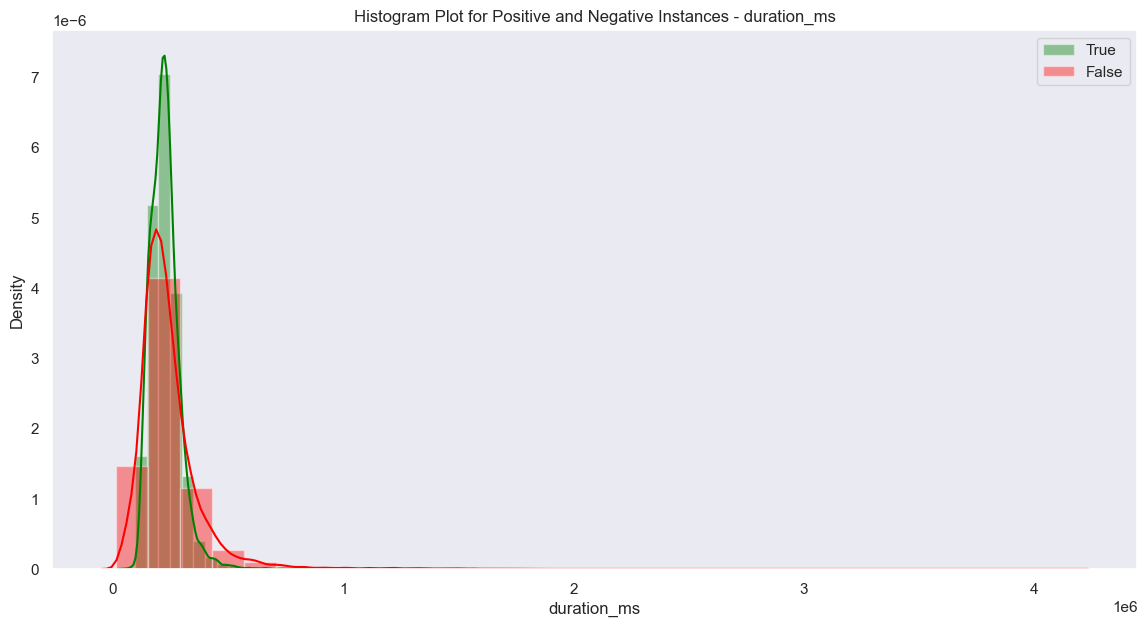

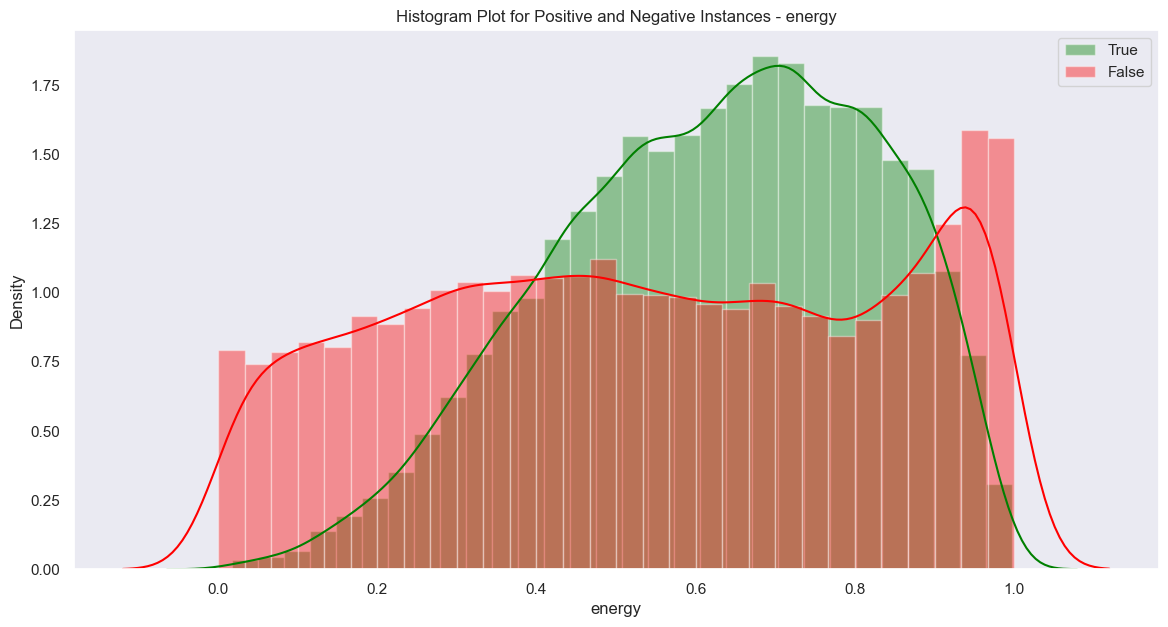

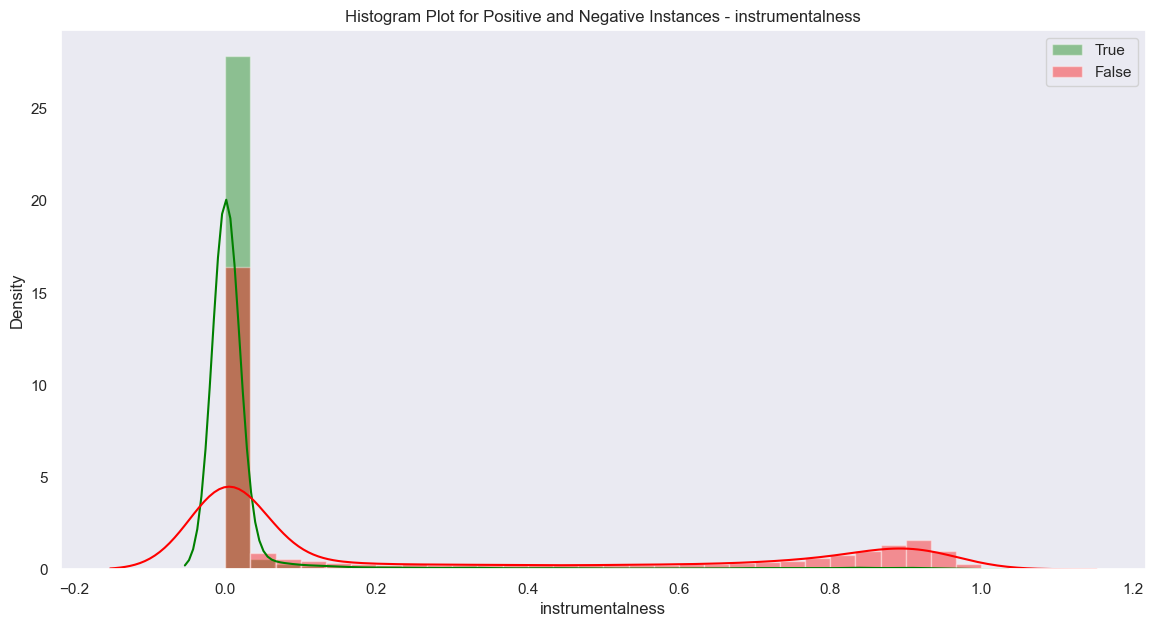

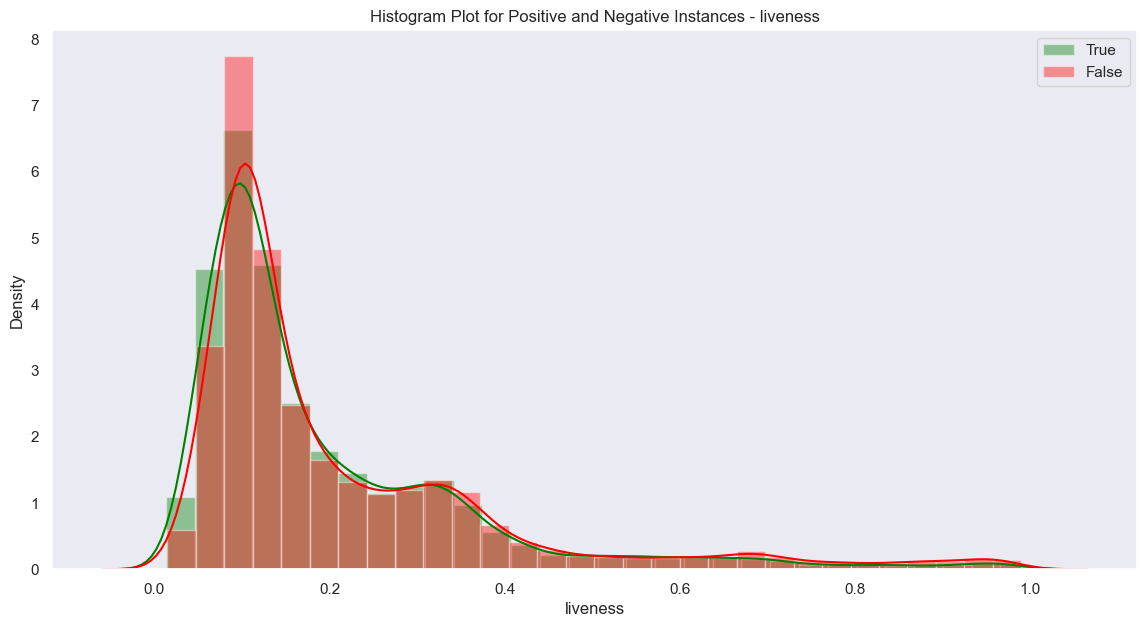

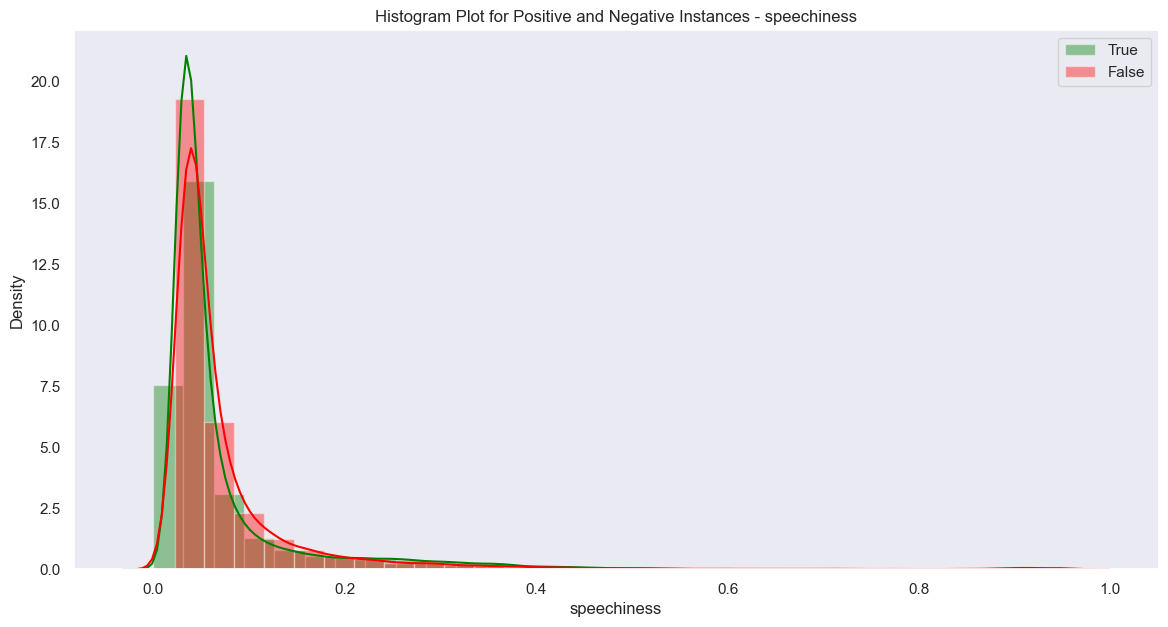

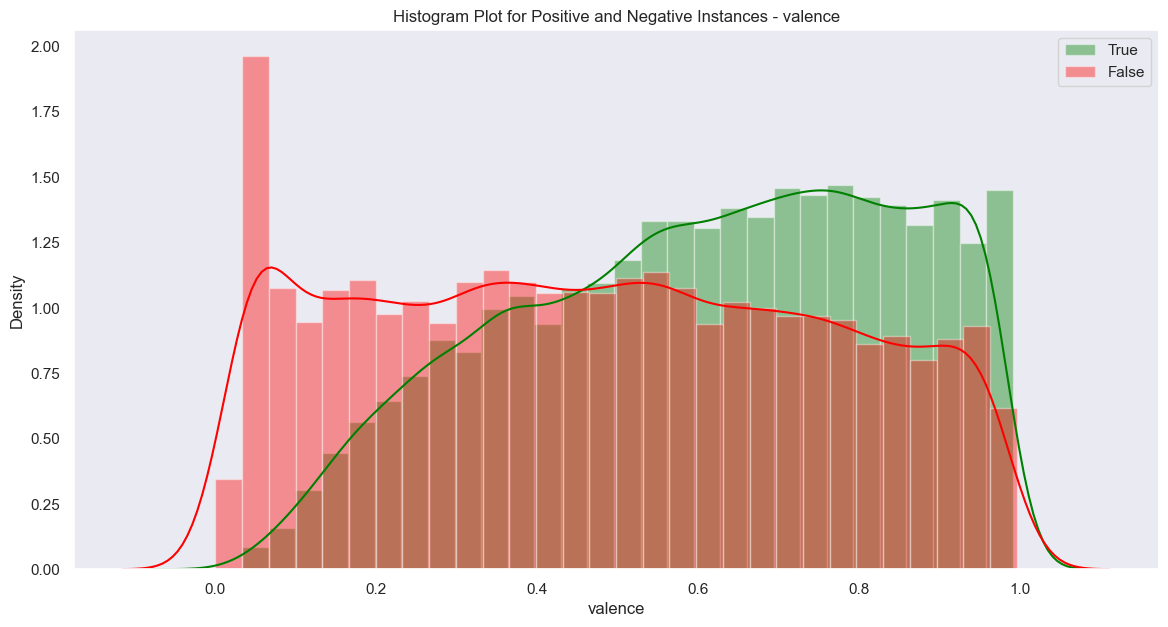

In [202]:
# Iterate through each feature in the list of interest_feature_cols
for feature_col in interest_feature_cols:
    
    # Filter data to extract positive (target=1) and negative (target=0) instances for the current feature
    pos_data = new_data[new_data["target"] == 1][feature_col]
    neg_data = new_data[new_data["target"] == 0][feature_col]
    
    # Create a new figure with specified size for the histogram plot
    plt.figure(figsize=(14, 7))
    
    # Plot the histograms of positive and negative instances using Seaborn distplot
    sns.distplot(pos_data, bins=30, label="True", color="green")
    sns.distplot(neg_data, bins=30, label="False", color="red")
    
    # Add legend to the plot and set a title based on the current feature
    plt.legend(loc="upper right")
    plt.title(f"Histogram Plot for Positive and Negative Instances - {feature_col}")
    
    # Display a grid in the plot
    plt.grid()
    
    # Show the plot
    plt.show()

    #these plots show the top features that effects the predictions os a songs
    

# NEW EDA


## Visualisation - Individual features

### Predictor features

In [ ]:
#plotting each feautre for more understanding

#### Song Duration

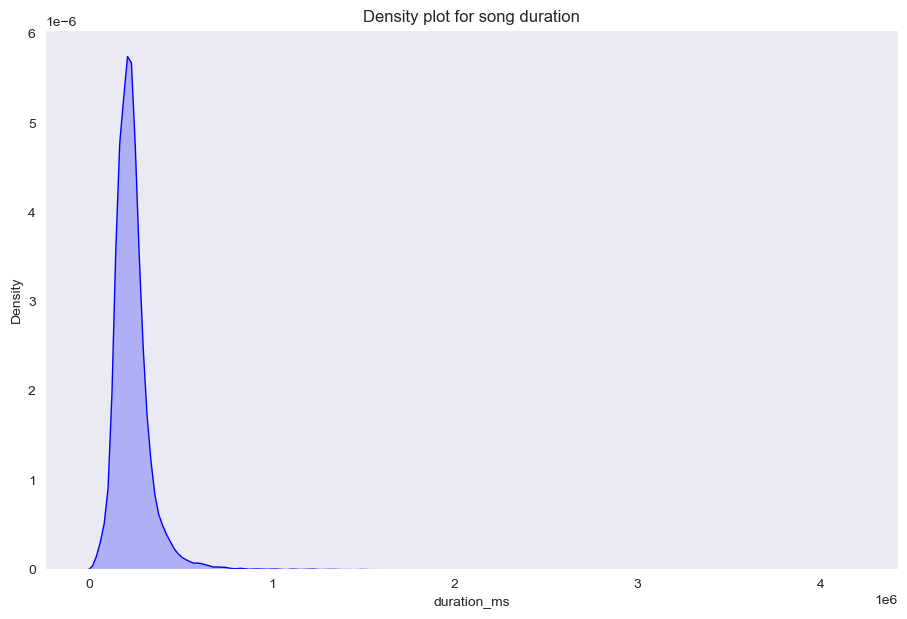

In [30]:
plt.figure(figsize=(11,7))
plt.title('Density plot for song duration')
sns.kdeplot(data['duration_ms'], color="blue", shade=True)
plt.grid()
plt.show()


#### Acousticness

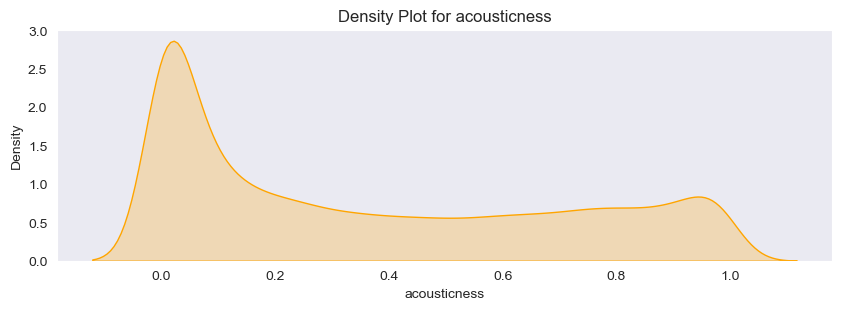

In [78]:
plt.figure(figsize=(10,3))
plt.title('Density Plot for acousticness')
sns.kdeplot(data['acousticness'], color="orange", shade=True)
plt.grid()
plt.show()

#### Danceability 

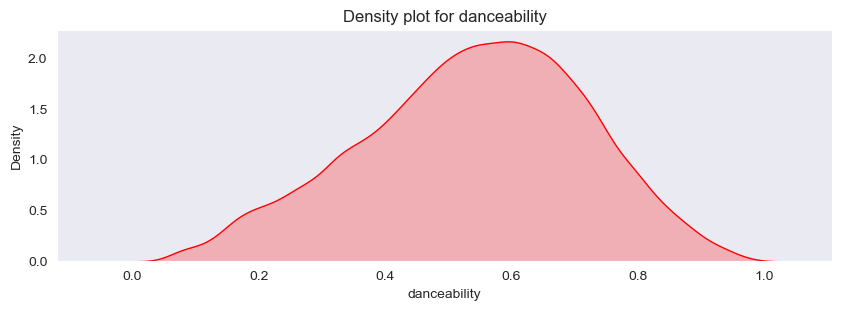

In [80]:
plt.figure(figsize=(10,3))
plt.title('Density plot for danceability')
sns.kdeplot(data['danceability'], color="red", shade=True)
plt.grid()
plt.show()

#### Energy

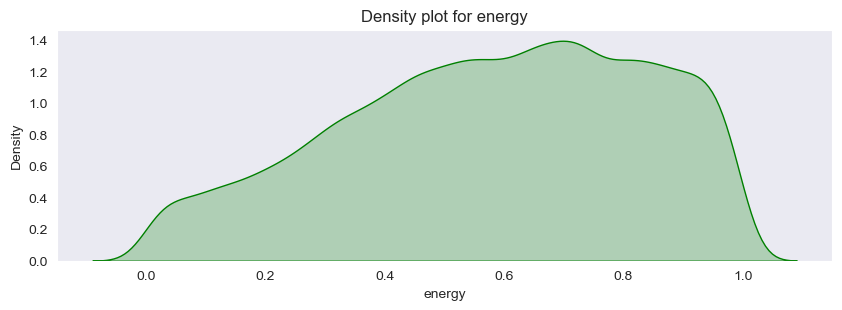

In [81]:
plt.figure(figsize=(10,3))
plt.title('Density plot for energy')
sns.kdeplot(data['energy'], color="green", shade=True)
plt.grid()
plt.show()

#### Instrumentalness

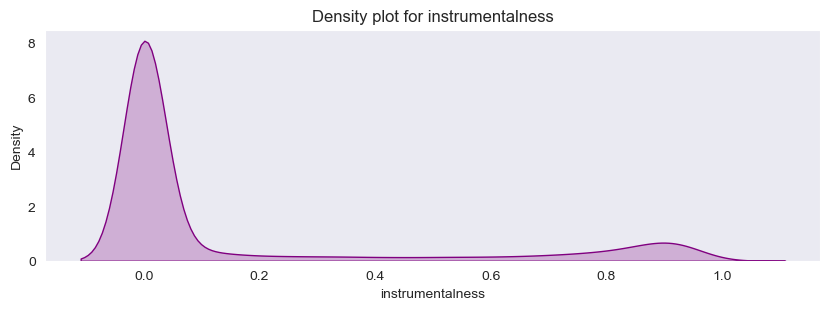

In [82]:
plt.figure(figsize=(10,3))
plt.title('Density plot for instrumentalness')
sns.kdeplot(data['instrumentalness'], color="purple", shade=True)
plt.grid()
plt.show()

### Key

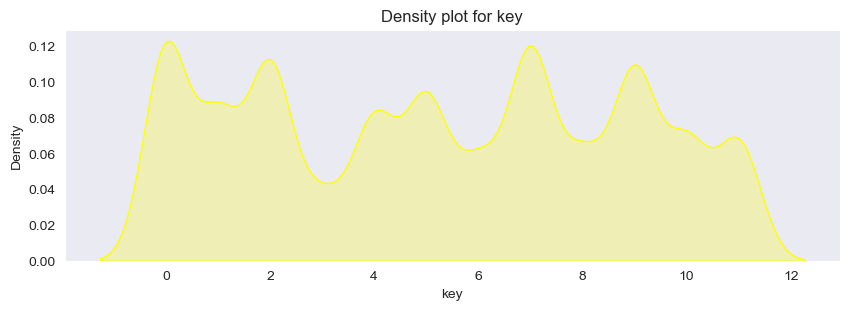

In [83]:
plt.figure(figsize=(10,3))
plt.title('Density plot for key')
sns.kdeplot(data['key'], color="yellow", shade=True)
plt.grid()
plt.show()

In [84]:
d = data['key'].value_counts()
d

0     5130
7     4962
2     4619
9     4469
5     3790
4     3323
1     3278
11    2815
10    2728
8     2345
6     2217
3     1430
Name: key, dtype: int64

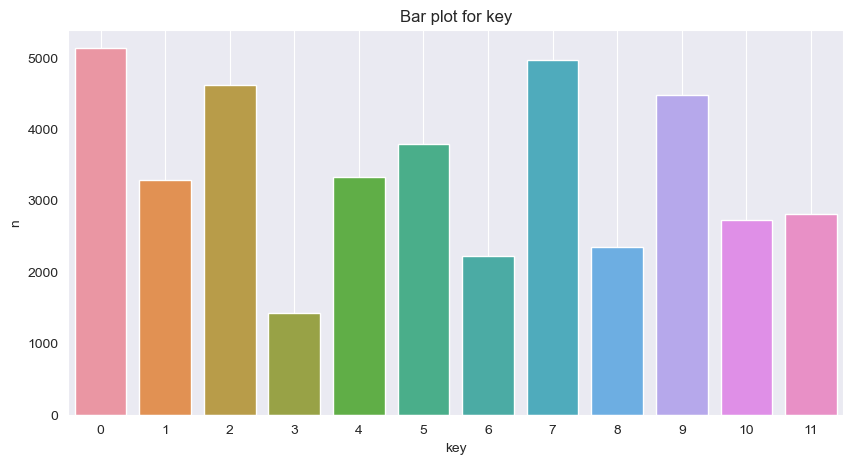

In [89]:
plt.figure(figsize=(10,5))
plt.title('Bar plot for key')
x = [i for i in range(0, 12)]
sns.barplot(x, d[x])
plt.grid()
plt.xlabel('key')
plt.ylabel('n')
plt.show()

#### Liveness

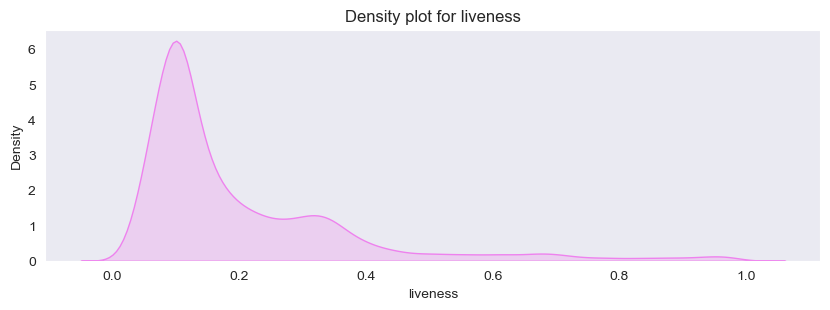

In [87]:
plt.figure(figsize=(10,3))
plt.title('Density plot for liveness')
sns.kdeplot(data['liveness'], color="violet", shade=True)
plt.grid()
plt.show()

#### loudness

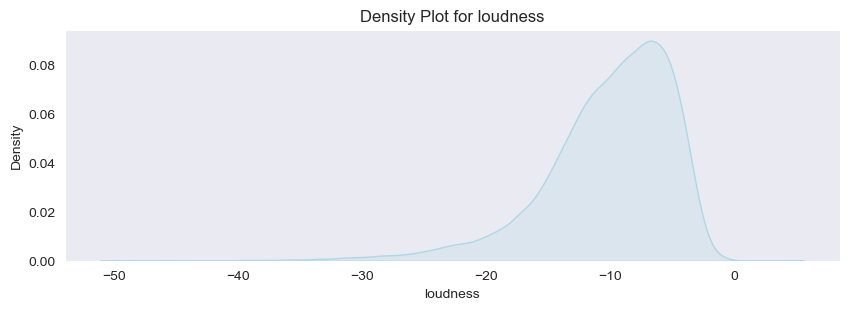

In [93]:
plt.figure(figsize=(10,3))
plt.title('Density Plot for loudness')
sns.kdeplot(data['loudness'], color="lightblue", shade=True)
plt.grid()
plt.show()

#### Mode

In [94]:
m = data['mode'].value_counts()
m

1    28501
0    12605
Name: mode, dtype: int64

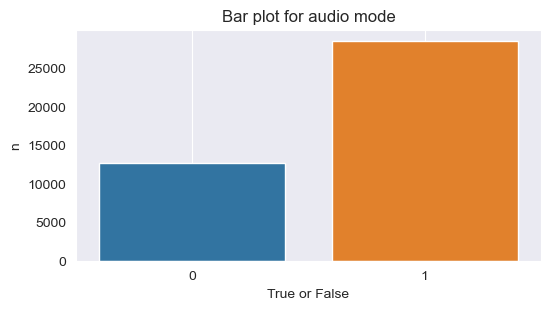

In [96]:
plt.figure(figsize=(6,3))
plt.title('Bar plot for audio mode')
x = [i for i in range(0, 2)]
sns.barplot(x, m[x])
plt.grid()
plt.xlabel('True or False')
plt.ylabel('n')
plt.show()

Text(0.5, 0.98, 'Song Popularity Features')

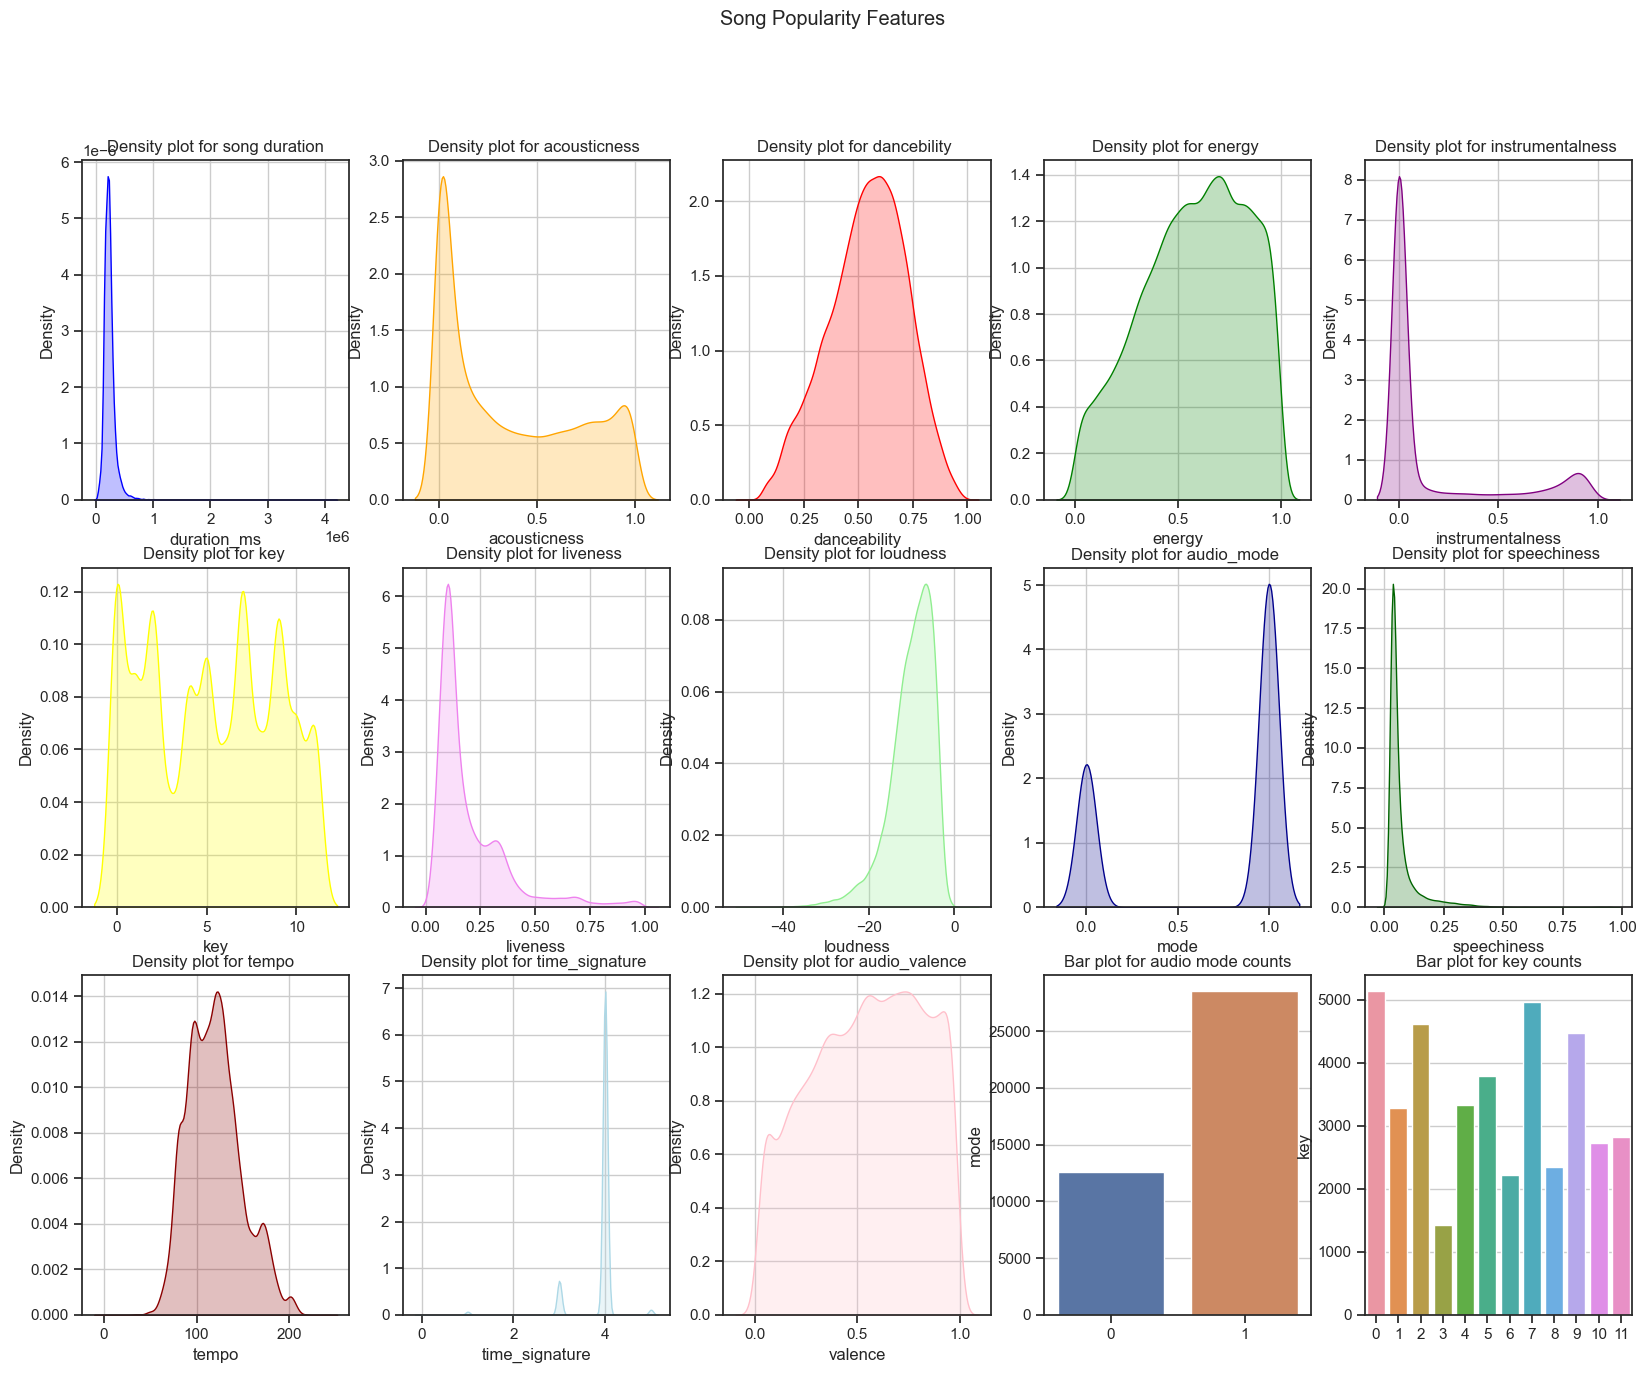

In [55]:
fig, axes = plt.subplots(nrows=3,ncols=5, figsize = (20,15))
sns.set_style("ticks",{'axes.grid' : True})

# ax1.title('Density plot for song duration')
sns.kdeplot(new_data['duration_ms'], color="blue", shade=True, ax=axes[0,0]).set(title='Density plot for song duration')

# ax2.title('Density plot for acousticness')
sns.kdeplot(new_data['acousticness'], color="orange", shade=True, ax=axes[0,1]).set(title='Density plot for acousticness ')
sns.kdeplot(new_data['danceability'], color="red", shade=True, ax=axes[0,2]).set(title='Density plot for dancebility ')

sns.kdeplot(new_data['energy'], color="green", shade=True, ax=axes[0,3]).set(title='Density plot for energy ')
sns.kdeplot(new_data['instrumentalness'], color="purple", shade=True, ax=axes[0,4]).set(title='Density plot for instrumentalness ')
sns.kdeplot(new_data['key'], color="yellow", shade=True, ax=axes[1,0]).set(title='Density plot for key ')

y = new_data['key'].value_counts()
x = [i for i in range(0, 12)]
sns.barplot(x, y[x], ax = axes[2,4]).set(title = 'Bar plot for key counts')

sns.kdeplot(new_data['liveness'], color="violet", shade=True, ax=axes[1,1]).set(title='Density plot for liveness ')
sns.kdeplot(new_data['loudness'], color="lightgreen", shade=True, ax=axes[1,2]).set(title='Density plot for loudness ')
sns.kdeplot(new_data['mode'], color="darkblue", shade=True, ax=axes[1,3]).set(title='Density plot for audio_mode ')

sns.kdeplot(new_data['speechiness'], color="darkgreen", shade=True, ax=axes[1,4]).set(title='Density plot for speechiness ')
sns.kdeplot(new_data['tempo'], color="darkred", shade=True, ax=axes[2,0]).set(title='Density plot for tempo ')
sns.kdeplot(new_data['time_signature'], color="lightblue", shade=True, ax=axes[2,1]).set(title='Density plot for time_signature ')

sns.kdeplot(new_data['valence'], color="pink", shade=True, ax=axes[2,2]).set(title='Density plot for audio_valence ')

z = new_data['mode'].value_counts()
x = [i for i in range(0, 2)]

sns.barplot(x, z[x], ax = axes[2,3]).set(title ='Bar plot for audio mode counts')
fig.suptitle( 'Song Popularity Features')

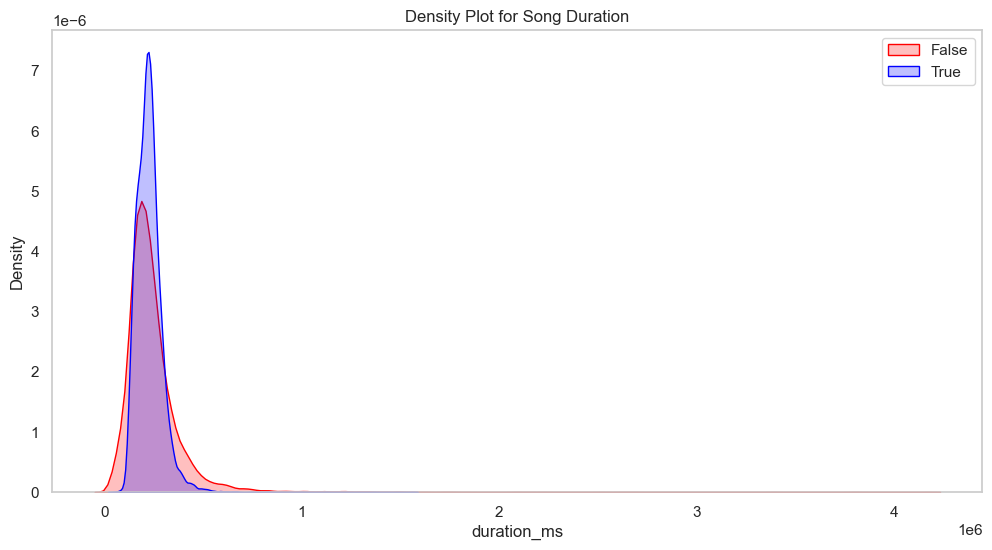

In [173]:
# Create a new figure with the specified size for the density plot
plt.figure(figsize=(12, 6))

# Set the title for the density plot
plt.title('Density Plot for Song Duration')

# Create a kernel density estimate (KDE) plot for song duration based on target values
# KDE plots are used to visualize the distribution of data
# KDE plots with 'shade=True' add shaded areas under the curves for better visualization
sns.kdeplot(new_data.duration_ms[new_data['target'] == 0], color="red", shade=True)
sns.kdeplot(new_data.duration_ms[new_data['target'] == 1], color="blue", shade=True)

# Display a grid in the plot
plt.grid()

# Add legend to the plot indicating 'False' and 'True' target values
plt.legend(['False', 'True'])

# Show the density plot
plt.show()


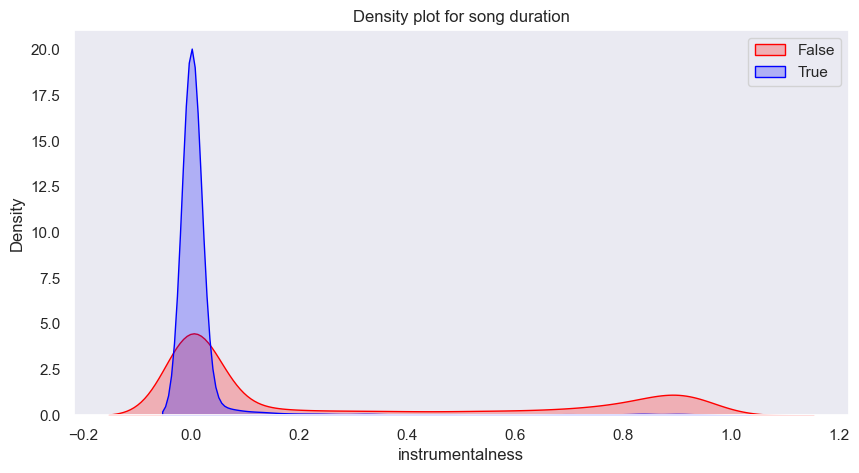

In [159]:
# Create a new figure with the specified size for the density plot
plt.figure(figsize=(10, 5))

# Set the title for the density plot
plt.title('Density Plot for Instrumentalness')

# Create a kernel density estimate (KDE) plot for instrumentalness based on target values
# KDE plots are used to visualize the distribution of data
# KDE plots with 'shade=True' add shaded areas under the curves for better visualization
sns.kdeplot(new_data.instrumentalness[new_data['target'] == 0], color="red", shade=True)
sns.kdeplot(new_data.instrumentalness[new_data['target'] == 1], color="blue", shade=True)

# Display a grid in the plot
plt.grid()

# Add legend to the plot indicating 'False' and 'True' target values
plt.legend(['False', 'True'])

# Show the density plot
plt.show()


# Feature interactions

## Target impact

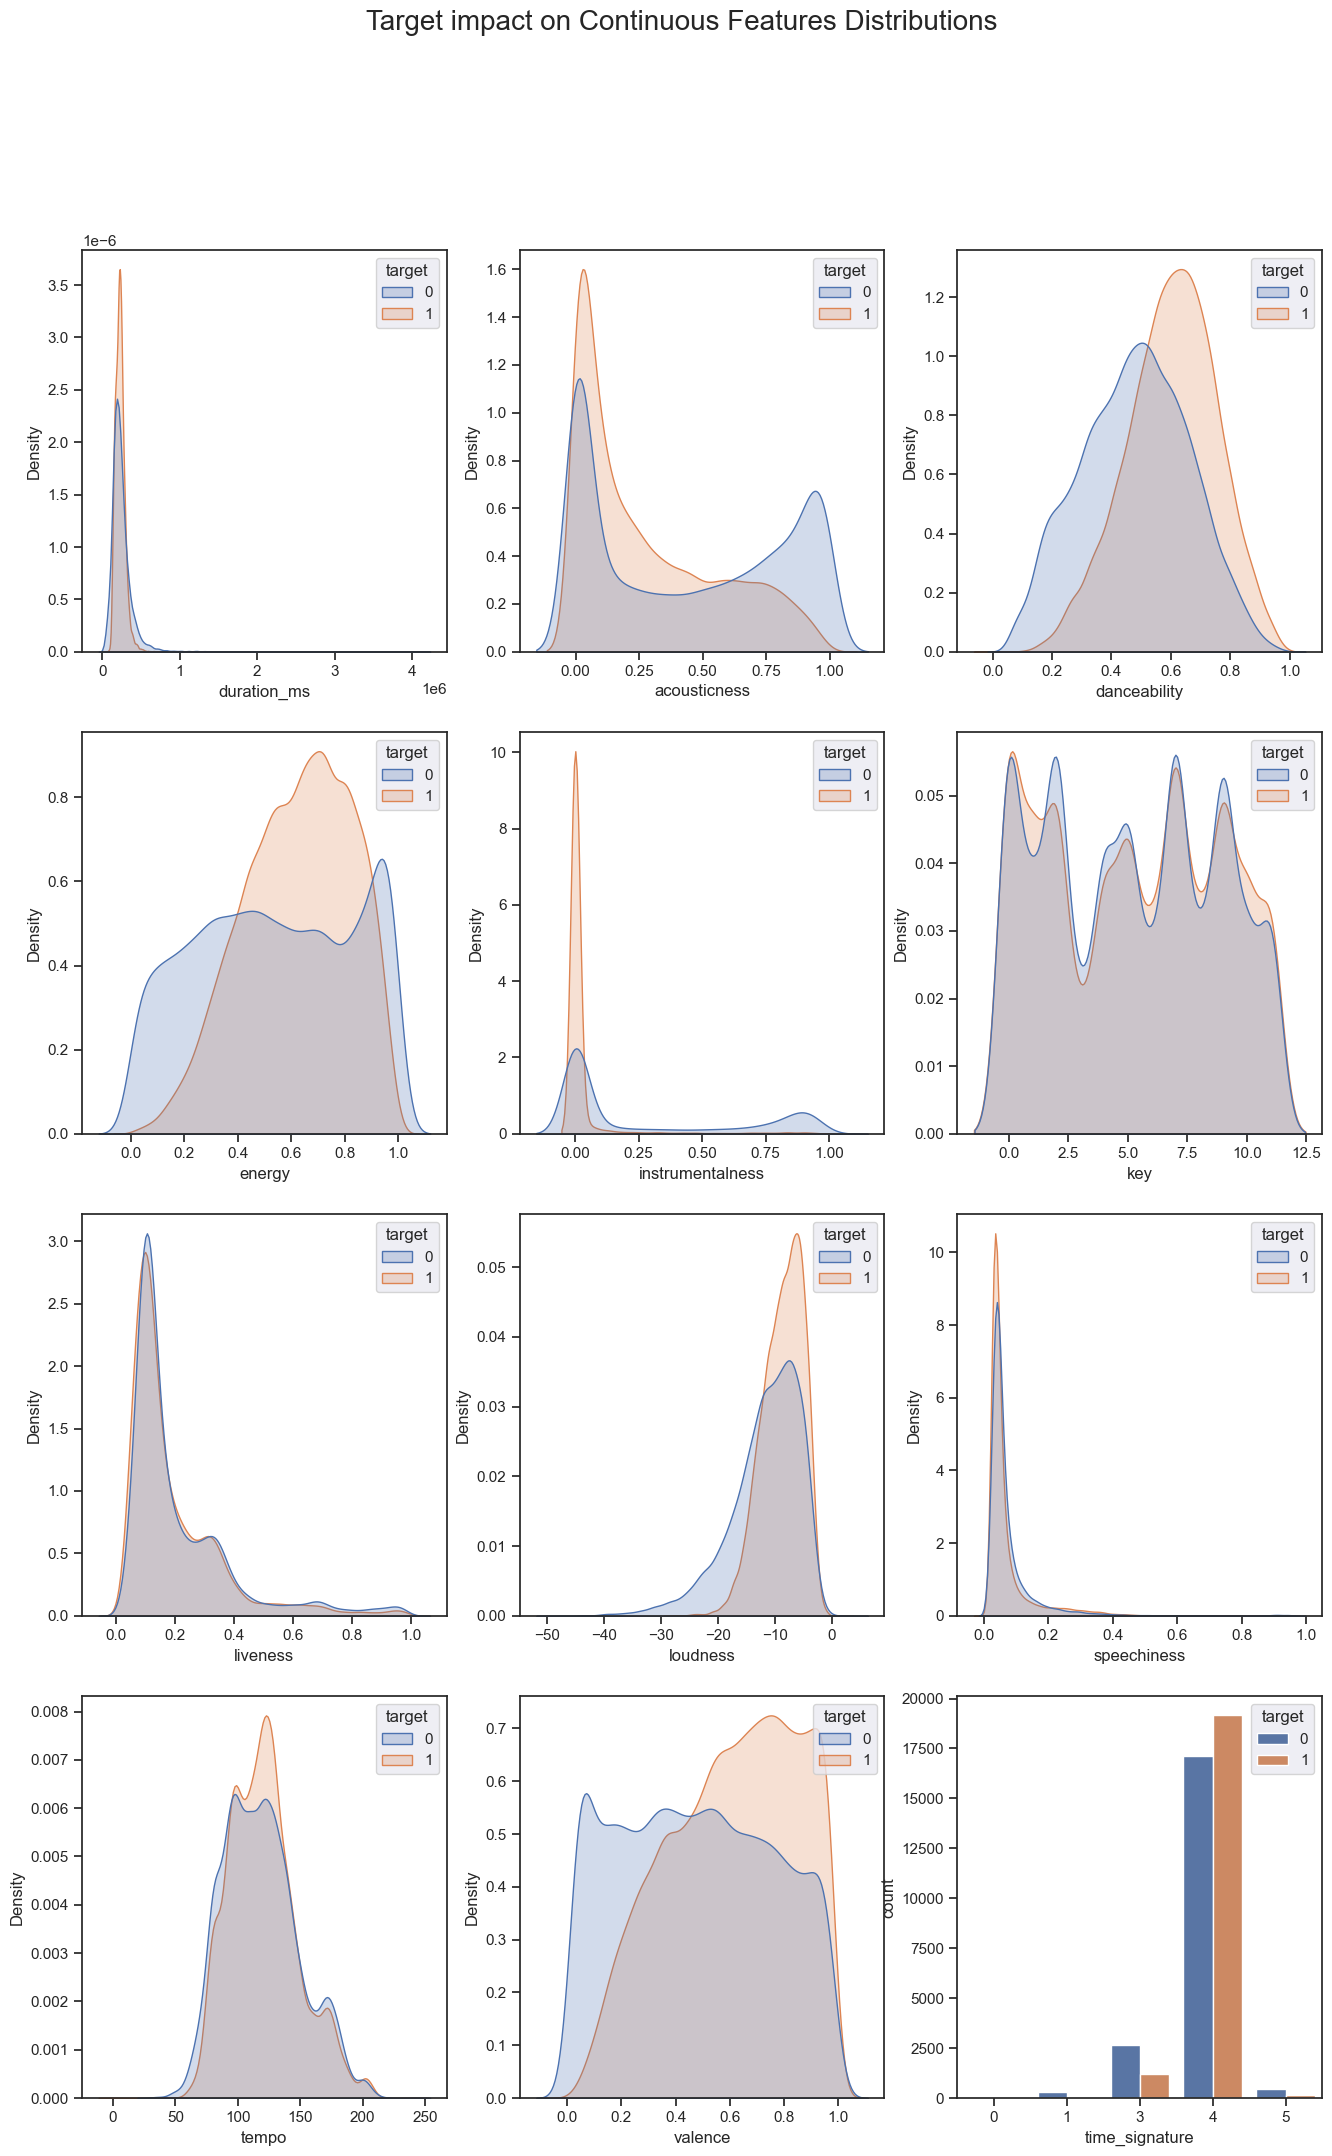

In [155]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,24))
sns.set_theme(style="darkgrid")
fig.suptitle('Target impact on Continuous Features Distributions', size = 20)

sns.kdeplot(data = new_data, x = "duration_ms", hue ='target', fill = True, ax = axes[0,0])
sns.kdeplot(data = new_data, x = "acousticness",hue ='target', fill = True, ax = axes[0,1])
sns.kdeplot(data = new_data, x = "danceability", hue ='target', fill = True, ax = axes[0,2])
sns.kdeplot(data = new_data, x = "energy", hue ='target', fill = True, ax = axes[1,0])
sns.kdeplot(data = new_data, x = "instrumentalness", hue ='target', fill = True, ax = axes[1,1])
sns.kdeplot(data = new_data, x = "key", hue ='target', fill = True, ax = axes[1,2])
sns.kdeplot(data = new_data, x = "liveness", hue ='target', fill = True, ax = axes[2,0])
sns.kdeplot(data = new_data, x = "loudness", hue ='target', fill = True, ax = axes[2,1])
sns.kdeplot(data = new_data, x = "speechiness", hue ='target', fill = True, ax = axes[2,2])
sns.kdeplot(data = new_data, x = "tempo", hue ='target', fill = True, ax = axes[3,0])
sns.kdeplot(data = new_data, x = "valence", hue ='target', fill = True, ax = axes[3,1])
sns.countplot(data = new_data, x = "time_signature", hue ='target', fill = True, ax = axes[3,2])
plt.show()

Text(0.5, 0.98, 'Target impact on categorical variables')

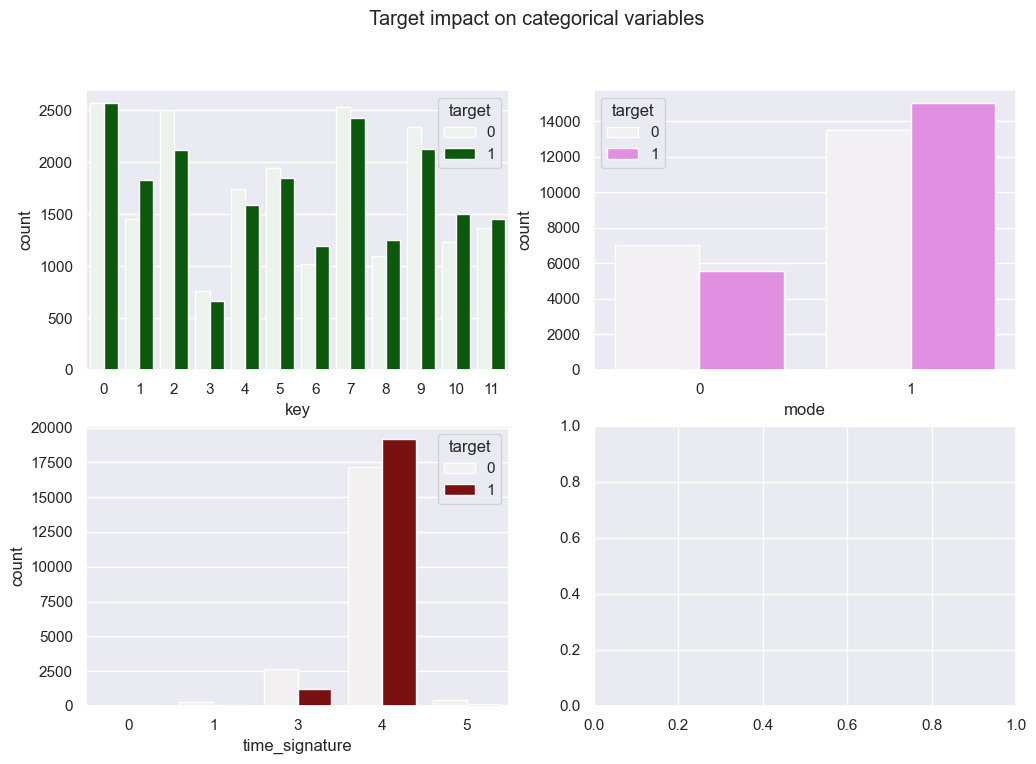

In [85]:
fig, axes = plt.subplots(2,2,figsize = (12, 8))
# x = train['key'].value_counts()
# y = train['audio_mode'].value_counts()
# z = train['time_signature'].value_counts()

sns.countplot(new_data['key'], hue = new_data['target'], ax = axes[0,0], color ='darkgreen')
sns.countplot(new_data['mode'], hue = new_data['target'], ax = axes[0,1], color ='violet')
sns.countplot(new_data['time_signature'], hue = new_data['target'], ax = axes[1,0], color ='darkred')
# sns.countplot(train['liveness'], hue = train['song_popularity'], ax = axes[1,1], color ='purple')

plt.suptitle('Target impact on categorical variables')

#### Target interactions

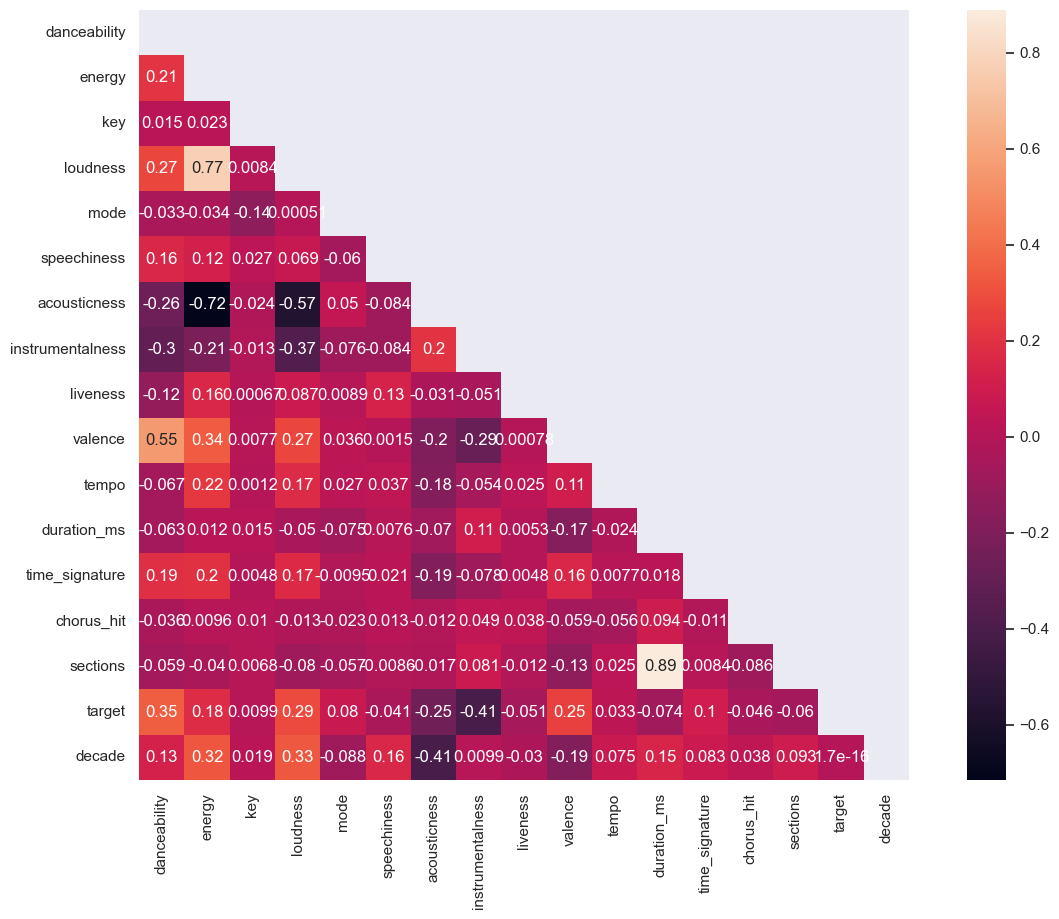

In [86]:

# Create a new figure with the specified size for the heatmap
plt.figure(figsize=(15, 10))

# Calculate the correlation matrix for the dataset
corr_matrix = new_data.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Create a heatmap using the correlation matrix
# 'square=True' ensures that the cells are square-shaped
# 'annot=True' adds annotations to the heatmap cells with correlation values
sns.heatmap(corr_matrix, mask=mask, square=True, annot=True)

# Display the heatmap
plt.show()


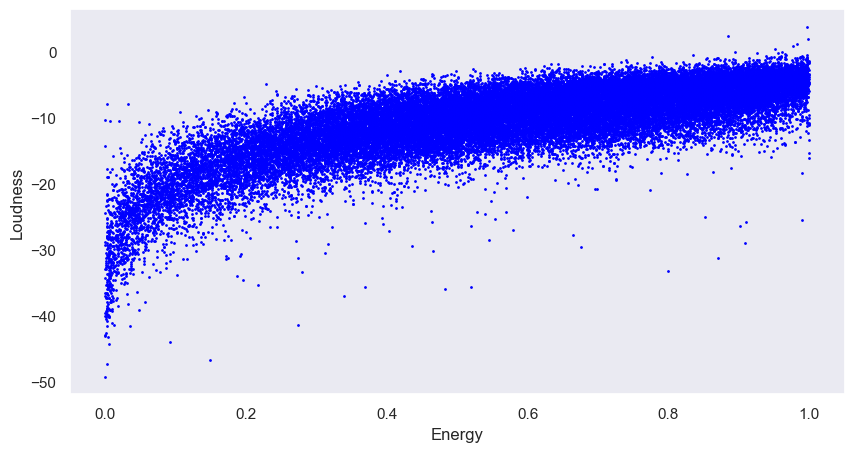

In [70]:
# Create a new figure with the specified size for the scatter plot
plt.figure(figsize=(10, 5))

# Create a scatter plot using 'energy' as the x-axis and 'loudness' as the y-axis
# 's' determines the size of the markers, 'c' sets the color of the markers
plt.scatter(new_data['energy'], new_data['loudness'], s=1, c='blue')

# Add labels to the x and y axes
plt.xlabel('Energy')
plt.ylabel('Loudness')

# Display grid lines on the plot
plt.grid()

# Show the scatter plot
plt.show()


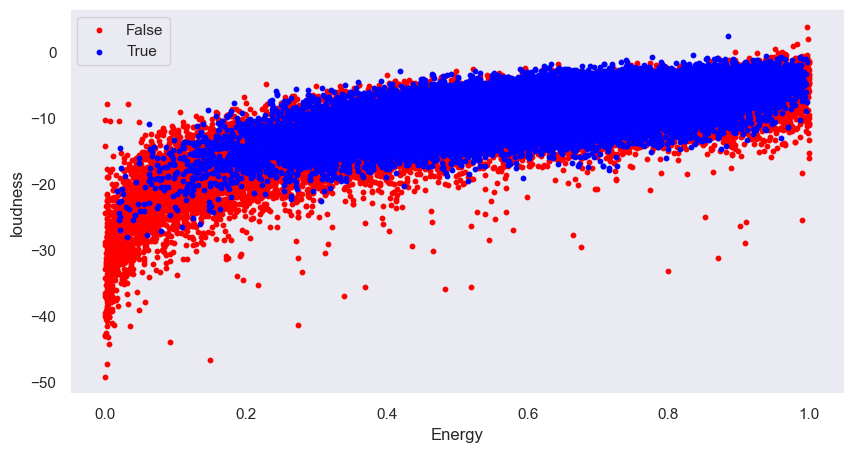

In [72]:
# Create a new figure with the specified size for the scatter plot
plt.figure(figsize=(10, 5))

# Scatter plot for 'energy' and 'loudness' features where target is 0 (False)
plt.scatter(new_data.energy[new_data['target'] == 0], new_data.loudness[new_data['target'] == 0], s=10, c='red')

# Scatter plot for 'energy' and 'loudness' features where target is 1 (True)
plt.scatter(new_data.energy[new_data['target'] == 1], new_data.loudness[new_data['target'] == 1], s=10, c='blue')

# Display grid lines on the plot
plt.grid()

# Add a legend to distinguish between 'False' and 'True' targets
plt.legend(['False', 'True'])

# Add labels to the x and y axes
plt.xlabel('Energy')
plt.ylabel('Loudness')

# Show the scatter plot
plt.show()


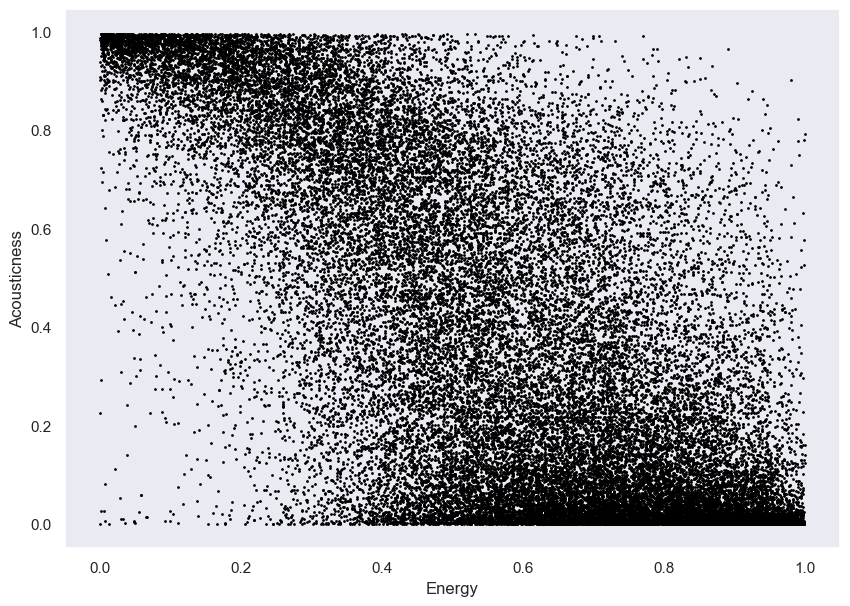

In [75]:
# Create a new figure with the specified size for the scatter plot
plt.figure(figsize=(10, 7))

# Scatter plot for 'energy' and 'acousticness' features
plt.scatter(data['energy'], data['acousticness'], s=1, c='black')

# Display grid lines on the plot
plt.grid()

# Add labels to the x and y axes
plt.xlabel('Energy')
plt.ylabel('Acousticness')

# Show the scatter plot
plt.show()


### Feature-target interactions

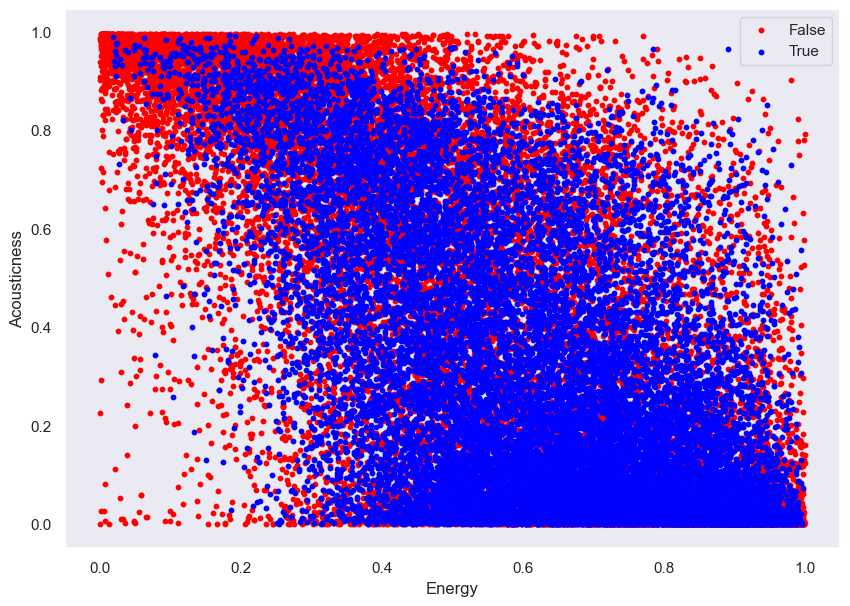

In [76]:
# Create a new figure with the specified size for the scatter plot
plt.figure(figsize=(10, 7))

# Scatter plot for 'energy' and 'acousticness' features with separate colors for different target values
plt.scatter(data.energy[data['target'] == 0], data.acousticness[data['target'] == 0], s=10, c='red')
plt.scatter(data.energy[data['target'] == 1], data.acousticness[data['target'] == 1], s=10, c='blue')

# Display grid lines on the plot
plt.grid()

# Add a legend to distinguish between target values
plt.legend(['False', 'True'])

# Add labels to the x and y axes
plt.xlabel('Energy')
plt.ylabel('Acousticness')

# Show the scatter plot
plt.show()


### For finding the coorelations between features

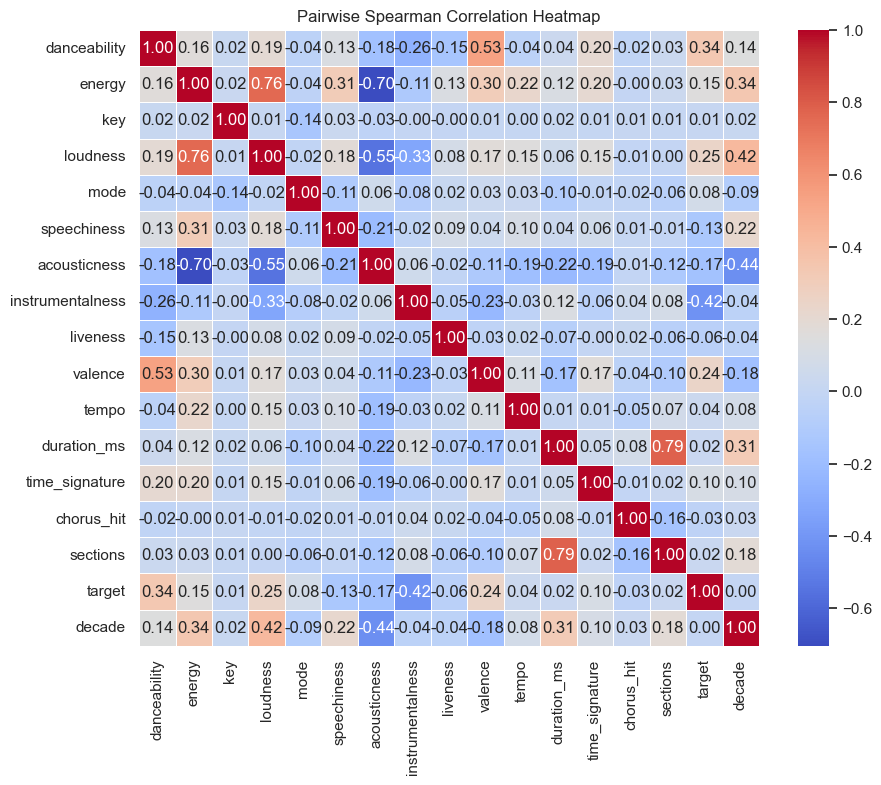

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr



# Step 1: Convert all columns to numeric
data = new_data.apply(pd.to_numeric, errors='coerce')

# Step 2: Calculate the pairwise Spearman correlation
correlation_matrix = new_data.corr(method='spearman')

# Step 3: Create the correlation plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pairwise Spearman Correlation Heatmap")
plt.show()


In [23]:
new_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,0.342,0.462,4,-12.931,0,0.0389,0.51400,0.018100,0.0977,0.397,98.466,816867,4,24.84938,33,0,1970
1,0.861,0.519,2,-6.404,1,0.1120,0.13600,0.000000,0.1230,0.519,81.966,254533,4,50.03590,11,1,2000
2,0.900,0.916,1,-7.481,0,0.1150,0.22000,0.000141,0.0323,0.538,102.916,277894,4,24.71271,16,0,1980
3,0.714,0.301,2,-14.800,1,0.1230,0.15600,0.661000,0.2290,0.651,74.856,357671,4,104.64231,11,0,1970
4,0.661,0.645,4,-13.520,1,0.0487,0.00895,0.000000,0.0362,0.930,136.693,204640,4,31.99617,10,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,0.435,0.834,10,-10.762,1,0.0415,0.78900,0.422000,0.9320,0.708,114.130,263067,4,17.81915,10,0,1960
41102,0.499,0.880,6,-6.424,0,0.0654,0.01080,0.000028,0.2260,0.390,147.899,264800,4,55.42304,11,1,2000
41103,0.326,0.816,8,-14.825,1,0.0527,0.88100,0.326000,0.1850,0.826,147.213,259267,4,25.73316,13,1,1960
41104,0.659,0.257,9,-16.552,1,0.0382,0.89000,0.000140,0.2520,0.222,102.977,228160,4,20.91621,13,1,1970


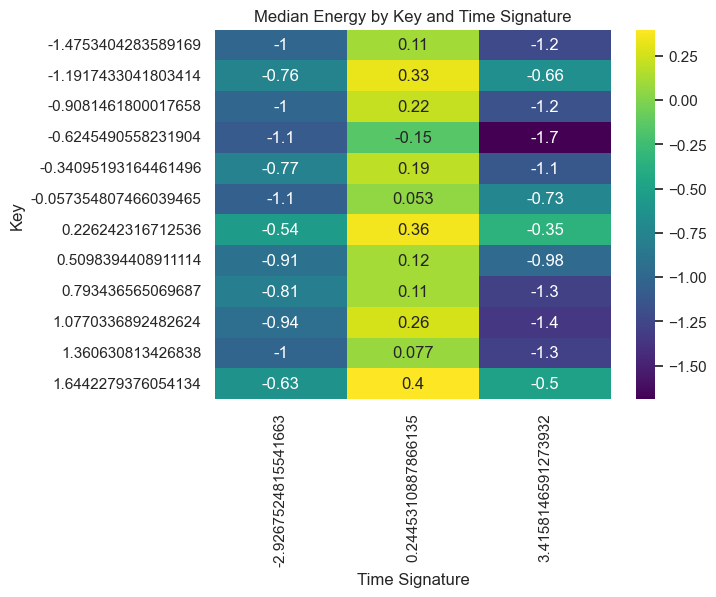

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your 'train' DataFrame

# Drop rows with missing values
# train = train.dropna()

# Group by 'key' and 'time_signature', calculate median energy, and reset index
grouped_data = X_train.groupby(['key', 'time_signature'])['energy'].median().reset_index()

# Set up seaborn for plotting
sns.set(style="whitegrid")

# Create the heatmap
plot = sns.heatmap(data=grouped_data.pivot('key', 'time_signature', 'energy'), annot=True, cmap="viridis")

# Customize plot aesthetics
plot.set_title("Median Energy by Key and Time Signature")
plot.set_xlabel("Time Signature")
plot.set_ylabel("Key")

# Show the plot
plt.show()


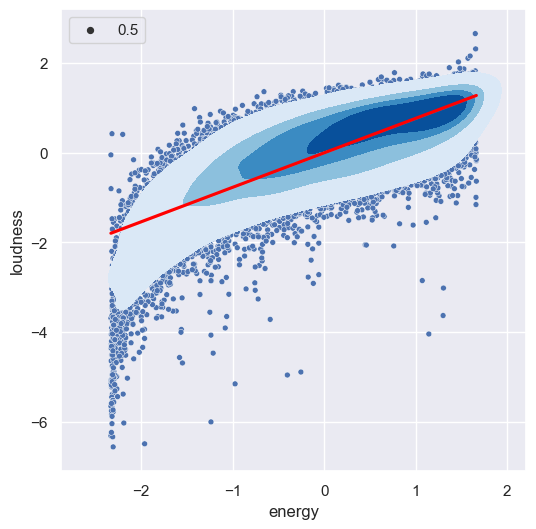

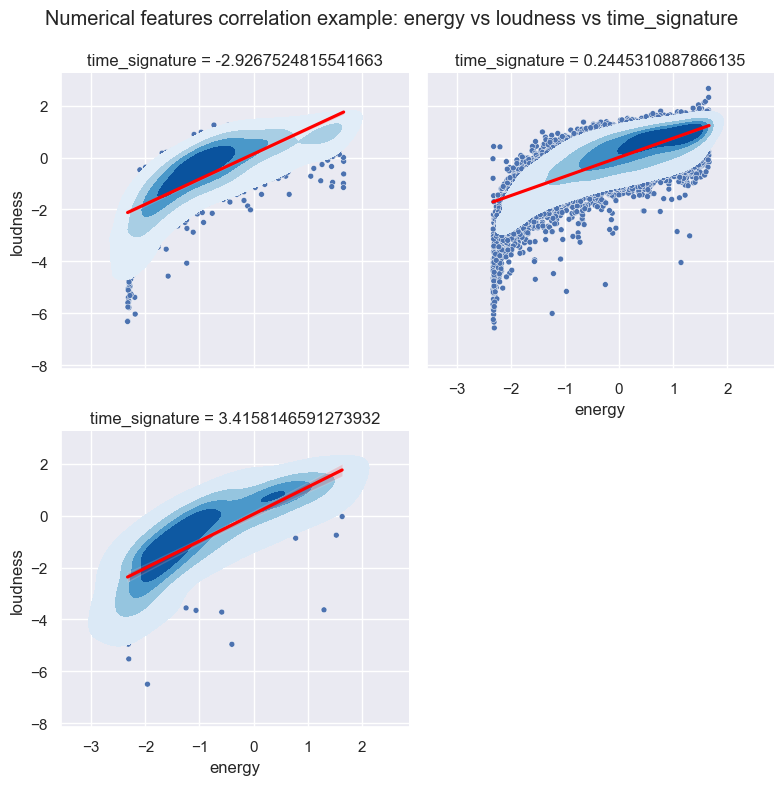

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values from the 'train' DataFrame


# Create a scatter plot with density contours and linear regression line
plt.figure(figsize=(6, 6))
sns.scatterplot(data=X_train, x='energy', y='loudness', size=0.5)
sns.kdeplot(data=X_train, x='energy', y='loudness', cmap='Blues', fill=True, levels=5)
sns.regplot(data=X_train, x='energy', y='loudness', scatter=False, color='red', line_kws={'color': 'red'})

# Facet the plot based on 'time_signature'
g = sns.FacetGrid(X_train, col='time_signature', height=4, col_wrap=2)
g.map(sns.scatterplot, 'energy', 'loudness', size=0.5)
g.map(sns.kdeplot, 'energy', 'loudness', cmap='Blues', fill=True, levels=5)
g.map(sns.regplot, 'energy', 'loudness', scatter=False, color='red', line_kws={'color': 'red'})

# Set plot aesthetics
sns.set_style('whitegrid')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Numerical features correlation example: energy vs loudness vs time_signature")

plt.show()


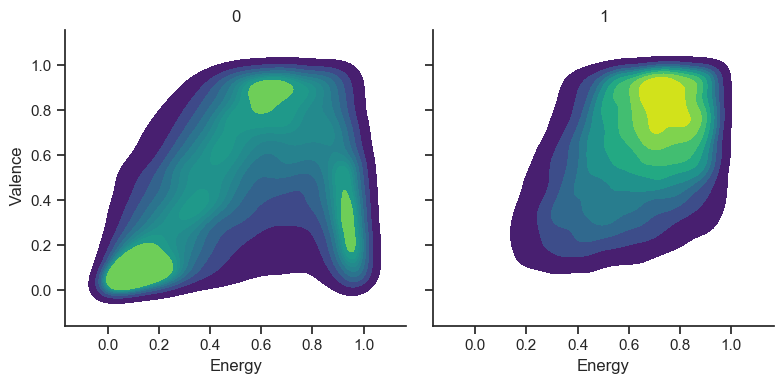

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values


# Create the 2D density plot using seaborn


# Facet the plot based on 'song_popularity'
g = sns.FacetGrid(data, col='target', col_wrap=2, height=4)
g.map_dataframe(sns.kdeplot, x='energy', y='valence', fill=True, cmap="viridis")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Energy", " Valence")

# Show the plots
plt.tight_layout()
plt.show()


#  DATA ANALYSIS(basic)

### Top 5 most popular artists from year 1960-1969

### This EDA is for getting some insights or exploration between the data

In [165]:
top_five_artists = dfs[0].groupby("artist").count().sort_values(by="track",ascending=False)["track"][:5]
top_five_artists

artist
Traditional        167
P. Susheela        130
Jerry Goldsmith    119
Harry Belafonte    117
Ennio Morricone     97
Name: track, dtype: int64

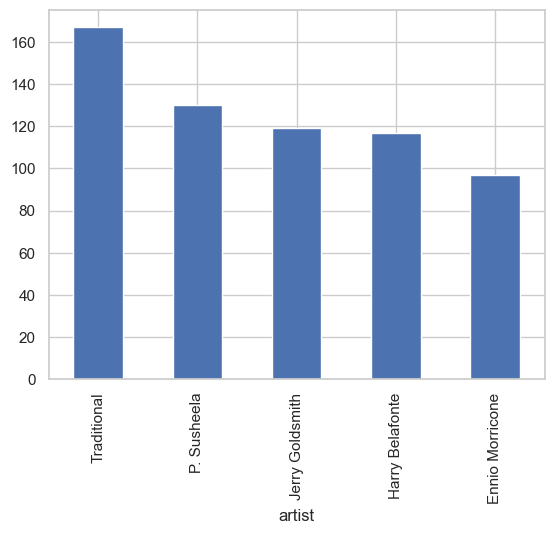

In [166]:
top_five_artists.plot.bar()
plt.show()

In [ ]:
### Top 5 loudest tracks

In [167]:
top_five_loudest_tracks = data[["loudness" , "track"]].sort_values(by="loudness", ascending=True)[:5]
top_five_loudest_tracks

,loudness,track
3493,-49.253,Bar 641-655
28318,-47.327,Spiegel im Spiegel
36262,-46.655,Brown Noise Train
27830,-44.347,In A Landscape
1333,-43.989,The Ivanov Suite: II. The Scream


In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness", y="track", data=top_five_loudest_tracks)
plt.show()

In [ ]:
### Artist with the most danceability song

In [168]:
top_five_artists_danceability_songs = data[["danceability" , "track" , "artist"]].sort_values(by="danceability" , 
                                                                                                 ascending =False)[:5]
top_five_artists_danceability_songs

,danceability,track,artist
27292,0.988,Funky Cold Medina,Tone-Loc
27158,0.986,Go Girl,Pitbull Featuring Trina & Young Bo$$
29814,0.981,Cash Me Outside (#CashMeOutside),DJ Suede The Remix God
32149,0.980,State of Shock,The Jacksons
7585,0.980,Ice Ice Baby,Glee Cast


In [172]:
top_ten_instrumental_tracks = data[["instrumentalness" , "track" , "artist"]].sort_values(by="instrumentalness" ,
                                                                                         ascending=False)[:5]
top_ten_instrumental_tracks

,instrumentalness,track,artist
9323,1.000,Rainy Alley,Nataural
9182,0.999,Tema drammatico 3,Giovanni Fusco
40987,0.999,Under Shelter Rain,Nataural
8105,0.999,Deep Rain,Nataural
23649,0.999,Stormy Rain,Nataural


## data set link :https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset